In [408]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [409]:
master_df = pd.read_csv('telecom_churn_data.csv')
master_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [410]:
master_df.shape

(99999, 226)

In [411]:
master_df['mobile_number'].nunique()

99999


The data set has 99999 rows and the number of unique mobile number is too 99999 hence each row corresponds to a unique mobile number

#### Filter High Value customers

Identify high value customers - good and action phase - good phase is month 6 and 7.
The columns of interest are recharge amounts.

In [412]:
rec_cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_num_6', 'total_rech_num_7']

In [413]:
for c in rec_cols:
    print(f'Null values for column "{c}": {sum(master_df[c].isna())}')

Null values for column "total_rech_amt_6": 0
Null values for column "total_rech_amt_7": 0
Null values for column "total_rech_num_6": 0
Null values for column "total_rech_num_7": 0


In [414]:
for c in rec_cols:
    print(f'Number of rows of "{c}" not int : {sum(master_df[c].map(type) != int)}')

Number of rows of "total_rech_amt_6" not int : 0
Number of rows of "total_rech_amt_7" not int : 0
Number of rows of "total_rech_num_6" not int : 0
Number of rows of "total_rech_num_7" not int : 0


None of the columns pertaining to recharge amounts of first 2 months and the number of times recharged - have values other than int and all of them have 99999 values in total with no nan values. Hence data quality is verified.

In [415]:
master_df[(master_df['total_rech_num_6'] == 0) & (master_df['total_rech_amt_6'] > 0)].shape[0]

0

In [416]:
master_df[(master_df['total_rech_num_7'] == 0) & (master_df['total_rech_amt_7'] > 0)].shape[0]

0

The above code was to check that if the total recharge done is zero for months 6 and 7 then the number of times recharge done should too be zero. Its perfect that way.

In [417]:
def handle_data_cols_na(data_rec_cols):
    for c in data_rec_cols:
        print(f'na rows for "{c}" {sum(master_df[c].isna())}')

    # if count of recharge is 0 or na and 
    #    date of last recharge is na and
    #    average rech amount is 0 or na,
    # then fill the na values is those rows to 0
    rows_where_count_amount_zero = master_df[(((master_df[data_rec_cols[1]]==0)|
                                              (master_df[data_rec_cols[1]].isna()))&
                                             (master_df[data_rec_cols[3]].isna())&
                                             ((master_df[data_rec_cols[2]]==0)|
                                              (master_df[data_rec_cols[2]].isna()))&
                                             ((master_df[data_rec_cols[0]]==0)|
                                              (master_df[data_rec_cols[0]].isna())))].index

    print(f'Len of filtered rows {len(rows_where_count_amount_zero)}')

    for c in data_rec_cols:
        master_df.at[rows_where_count_amount_zero, c] = 0

    for c in data_rec_cols:
        print(f'na rows for "{c}" {sum(master_df[c].isna())}')

In [418]:
handle_data_cols_na(['av_rech_amt_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'date_of_last_rech_data_6'])

na rows for "av_rech_amt_data_6" 74846
na rows for "count_rech_2g_6" 74846
na rows for "count_rech_3g_6" 74846
na rows for "date_of_last_rech_data_6" 74846
Len of filtered rows 74846
na rows for "av_rech_amt_data_6" 0
na rows for "count_rech_2g_6" 0
na rows for "count_rech_3g_6" 0
na rows for "date_of_last_rech_data_6" 0


In [419]:
handle_data_cols_na(['av_rech_amt_data_7', 'count_rech_2g_7', 'count_rech_3g_7', 'date_of_last_rech_data_7'])

na rows for "av_rech_amt_data_7" 74428
na rows for "count_rech_2g_7" 74428
na rows for "count_rech_3g_7" 74428
na rows for "date_of_last_rech_data_7" 74428
Len of filtered rows 74428
na rows for "av_rech_amt_data_7" 0
na rows for "count_rech_2g_7" 0
na rows for "count_rech_3g_7" 0
na rows for "date_of_last_rech_data_7" 0


In [420]:
handle_data_cols_na(['av_rech_amt_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'date_of_last_rech_data_8'])

na rows for "av_rech_amt_data_8" 73660
na rows for "count_rech_2g_8" 73660
na rows for "count_rech_3g_8" 73660
na rows for "date_of_last_rech_data_8" 73660
Len of filtered rows 73660
na rows for "av_rech_amt_data_8" 0
na rows for "count_rech_2g_8" 0
na rows for "count_rech_3g_8" 0
na rows for "date_of_last_rech_data_8" 0


In [421]:
# get the total recharge by adding up the total recharges of talktime and data for months 6, 7 and 8.
for m in ['6', '7', '8']:
    master_df['total_data_rech_month_'+m] = (master_df['count_rech_2g_'+m] + master_df['count_rech_3g_'+m]) \
                                                                        * master_df['av_rech_amt_data_'+m]

In [422]:
print(sum(master_df['total_data_rech_month_6'].isna()))
print(sum(master_df['total_data_rech_month_7'].isna()))

0
0


In [423]:
cols_for_avg_recharge_amnt = ['total_rech_amt_6', 'total_rech_amt_7',
                              'total_data_rech_month_6', 'total_data_rech_month_7']

master_df['avg_recharge_amt'] = master_df[cols_for_avg_recharge_amnt].sum(axis='columns') / 4

In [424]:
sum(master_df['avg_recharge_amt'].isna())

0

In [425]:
cut_off = master_df['avg_recharge_amt'].quantile(0.7)
cut_off

239.0

In [426]:
high_value_customers = master_df[master_df['avg_recharge_amt'] > cut_off]
high_value_customers.shape

(29953, 230)

#### Tag churners¶


In [427]:
tag_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
high_value_customers[tag_cols].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29953.000000,29953.000000,29953.000000,29953.000000
mean,265.079232,501.141639,91.405987,349.915812
std,358.502996,667.138160,282.104414,947.700826
min,0.000000,0.000000,0.000000,0.000000
25%,50.490000,47.730000,0.000000,0.000000
50%,158.030000,285.130000,0.000000,0.000000
75%,343.960000,698.790000,38.020000,321.570000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [428]:
high_value_customers['churn'] = high_value_customers[tag_cols].sum(axis='columns') == 0

high_value_customers['churn'].map({True: 1, False: 0})

high_value_customers['churn'].sum()

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2433

In [429]:
def pretty_print_cols_list(cols):
    rows = len(cols)//5
    if len(cols) % 5:
        rows += 1
    for i in range(rows):
        start_index = i*5
        print(cols[start_index:start_index+5])    

In [430]:
drop_month_9_cols = [c for c in high_value_customers.columns if '_9' in c]
pretty_print_cols_list(drop_month_9_cols)

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9']
['roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9']
['loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9']
['std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9']
['loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9']
['std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9']
['spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9']
['max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9']
['max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9']
['vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9']
['sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [431]:
high_value_customers = high_value_customers.drop(columns=drop_month_9_cols)
high_value_customers.shape

(29953, 177)

### Data Understanding and Cleanup

In [432]:
high_value_customers['circle_id'].nunique()

1

All customers belong to same circle - not useful.

In [433]:
high_value_customers = high_value_customers.drop(columns=['circle_id'])

In [434]:
date_cols = [c for c in high_value_customers.columns if 'date' in c]
pretty_print_cols_list(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7']
['date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


We can eliminate certain columns like date of last recharge,last recharge of data ,last date ,mobile number.As they are of no business value, afterall the amount of recharge matters.

In [435]:
high_value_customers = high_value_customers.drop(columns=date_cols)
high_value_customers = high_value_customers.drop(columns='mobile_number')
high_value_customers.shape

(29953, 166)

In [436]:
# get all cols where min and max are same
same_val_cols = []
for c in high_value_customers.columns:
    try:
        if high_value_customers[c].min() == high_value_customers[c].max():
            same_val_cols.append(c)
    except:
        pass
pretty_print_cols_list(same_val_cols)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7']
['std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


Drop all same valued columns as they dont offer any info.

In [437]:
high_value_customers = high_value_customers.drop(columns=same_val_cols)
high_value_customers.shape

(29953, 157)

Arpu is not useful attribute as the the tax of paid by the mobile operators.

In [438]:
arpu_cols = [c for c in high_value_customers.columns if 'arpu' in c]
pretty_print_cols_list(arpu_cols)

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7']
['arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']


In [439]:
high_value_customers = high_value_customers.drop(columns=arpu_cols)
high_value_customers.shape

(29953, 148)

#### Handle missing values

In [440]:
# look at columns where percentage of missing values is greater than 30%
def percentage(x):
    return round(x * 100, 2)

def get_missing_value_df(df):
    missing_values = pd.DataFrame()
    missing_cols = []
    missing_pers = []
    for c in df.columns:
        missing_percentage = percentage(df[c].isnull().sum() / df.shape[0])
        if missing_percentage > 0:
            missing_cols.append(c)
            missing_pers.append(missing_percentage)
    missing_values['col'] = missing_cols
    missing_values['per'] = missing_pers
    missing_values.columns=missing_values.columns.str.strip()
    missing_values.sort_values('per', ascending=False, inplace=True)
    return missing_values

In [441]:
missing_values = get_missing_value_df(high_value_customers)
print(missing_values[missing_values['per'] >= 30])

                  col    per
92          fb_user_8  46.80
83  total_rech_data_8  46.80
89   night_pck_user_8  46.80
86    max_rech_data_8  46.80
87   night_pck_user_6  44.11
81  total_rech_data_6  44.11
90          fb_user_6  44.11
84    max_rech_data_6  44.11
82  total_rech_data_7  43.12
85    max_rech_data_7  43.12
88   night_pck_user_7  43.12
91          fb_user_7  43.12


We can drop all the variables like total_rech_data_6,7,8 as we have new columns for it.We imputed right in the beginning for average recharge which determines it.Also max_rech_data 6,7,8 serves no purpose as total recharge is much more significant.

In [442]:
drop_cols = ['total_rech_data_8', 'max_rech_data_8',
             'total_rech_data_6', 'max_rech_data_6',
             'total_rech_data_7', 'max_rech_data_7']
high_value_customers = high_value_customers.drop(drop_cols, axis='columns')

In [443]:
missing_values = get_missing_value_df(high_value_customers)
print(missing_values[missing_values['per'] >= 30])

                 col    per
86         fb_user_8  46.80
83  night_pck_user_8  46.80
84         fb_user_6  44.11
81  night_pck_user_6  44.11
85         fb_user_7  43.12
82  night_pck_user_7  43.12


In [444]:
def mean_of_classes(df, col):
    print(f'Churn=1: mean:{col} = {df[df["churn"] == 1][col].mean()}')
    print(f'Churn=0: mean:{col} = {df[df["churn"] == 0][col].mean()}')    

In [445]:
high_value_customers['fb_user_8'].value_counts()

1.0    14297
0.0     1638
Name: fb_user_8, dtype: int64

In [446]:
mean_of_classes(high_value_customers, 'fb_user_8')

Churn=1: mean:fb_user_8 = 0.7581699346405228
Churn=0: mean:fb_user_8 = 0.9013310933057638


Since the fb_user column is a flag and that there is a difference between churned and non churned customers of its usage, we will consider na values to be 0.

In [447]:
cols = ['fb_user_6', 'fb_user_7', 'fb_user_8']
high_value_customers[cols] = high_value_customers[cols].fillna(0)

In [448]:
high_value_customers['night_pck_user_8'].value_counts()

0.0    15594
1.0      341
Name: night_pck_user_8, dtype: int64

In [449]:
mean_of_classes(high_value_customers, 'night_pck_user_8')

Churn=1: mean:night_pck_user_8 = 0.0196078431372549
Churn=0: mean:night_pck_user_8 = 0.02145257172395968


since the difference between classes is insignificant, we can drop night pck cols

In [450]:
cols = ['night_pck_user_'+str(m) for m in [6, 7, 8]]
high_value_customers = high_value_customers.drop(cols, axis='columns')

In [451]:
missing_values = get_missing_value_df(high_value_customers)
missing_values.head()

,col,per
80,ic_others_8,3.91
17,loc_og_t2m_mou_8,3.91
38,std_og_mou_8,3.91
44,spl_og_mou_8,3.91
35,std_og_t2f_mou_8,3.91


In [452]:
def BoxPlot(df, attributes, figsize=None):
    if not figsize:
        figsize = (18, 12)
    num_rows = len(attributes)
    i = 1
    for attribute in attributes:
        mean_of_classes(df, attribute)
        
        df = df[~df[attribute].isna()]
        churned_df = df[df['churn'] ==1]
        nonchurned_df = df[df['churn'] ==0]
        
        plt.figure(figsize=figsize)
        
        plt.subplot(num_rows, 2, i)
        plt.boxplot(churned_df[attribute])
        plt.title(f"Churn=1 {attribute}")
        
        plt.subplot(num_rows, 2, i+1)
        plt.boxplot(nonchurned_df[attribute])
        plt.title(f"Churn=0 {attribute}")
        plt.show()
        
        i = i + 2

Churn=1: mean:ic_others_6 = 0.9726260412099967
Churn=0: mean:ic_others_6 = 1.1936538886841215


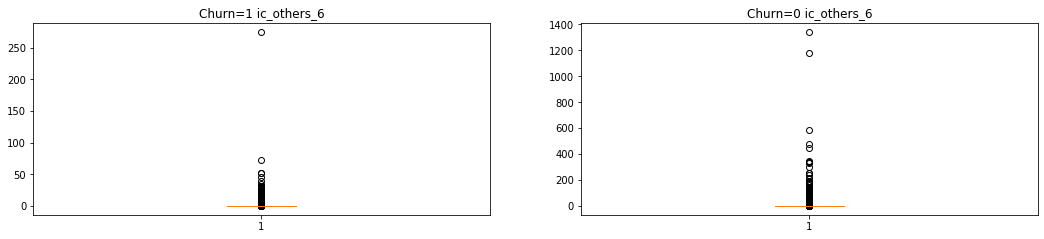

Churn=1: mean:ic_others_7 = 0.9186857936140662
Churn=0: mean:ic_others_7 = 1.5848339688298383


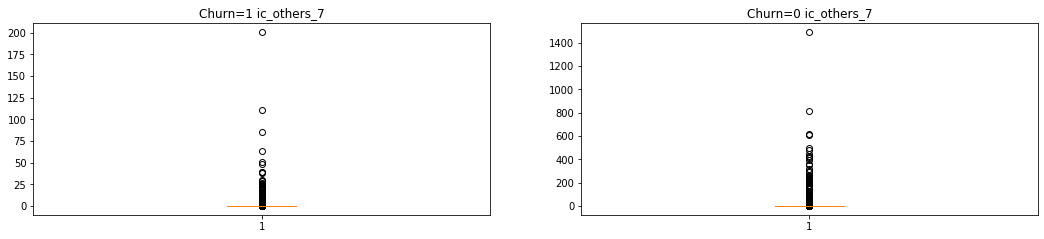

Churn=1: mean:ic_others_8 = 0.605648614609572
Churn=0: mean:ic_others_8 = 1.3199505061030206


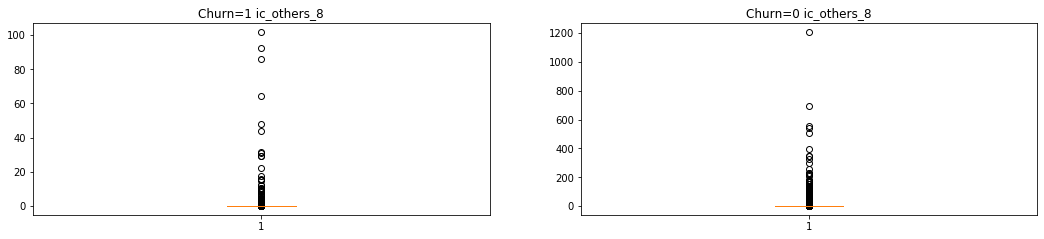

In [453]:
cols = ['ic_others_6','ic_others_7','ic_others_8']
BoxPlot(high_value_customers, cols)

There are some differences in distributions atleast with regard to extreme values.
Its good to retain them , they seem to be highly skewed, so they can be imputed by median.

In [454]:
#This function imputes with the median of respective churn/non churn classes
def ImputeMedian(df, attributes):
    for attribute in attributes:
        cf = df[~df[attribute].isna()]
        notna_notchurn_df = cf[(cf['churn']==0)]
        notna_churn_df = cf[(cf['churn']==1)]
        df.loc[((df['churn'] ==1) &(df[attribute].isna())),[attribute]]=np.median(notna_notchurn_df[attribute])
        df.loc[((df['churn'] ==0 )&(df[attribute].isna())),[attribute]]=np.median(notna_churn_df[attribute])
    return df

In [455]:
high_value_customers = ImputeMedian(high_value_customers, cols)

In [456]:
missing_values = get_missing_value_df(high_value_customers)
missing_values.head(10)

,col,per
77,isd_ic_mou_8,3.91
62,std_ic_t2t_mou_8,3.91
35,std_og_t2f_mou_8,3.91
44,spl_og_mou_8,3.91
32,std_og_t2m_mou_8,3.91
47,og_others_8,3.91
29,std_og_t2t_mou_8,3.91
50,loc_ic_t2t_mou_8,3.91
26,loc_og_mou_8,3.91
53,loc_ic_t2m_mou_8,3.91


Churn=1: mean:loc_og_t2t_mou_6 = 63.81162209557193
Churn=0: mean:loc_og_t2t_mou_6 = 88.00937559896477


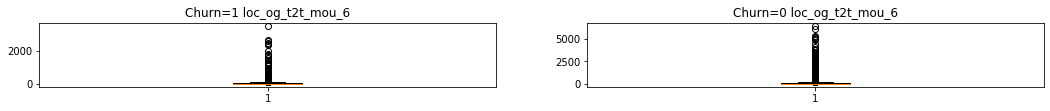

Churn=1: mean:loc_og_t2t_mou_7 = 49.62299861175375
Churn=0: mean:loc_og_t2t_mou_7 = 90.94966090400632


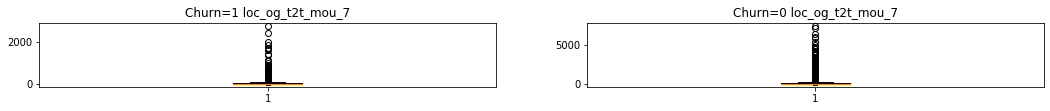

Churn=1: mean:loc_og_t2t_mou_8 = 24.174993702770813
Churn=0: mean:loc_og_t2t_mou_8 = 85.49282822268277


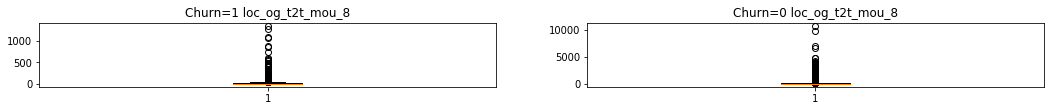

In [457]:
cols = ['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8']
BoxPlot(high_value_customers, cols, figsize=(18, 4))

There is considerable skewness in the data between churn/non churn. Impute the values of na's with their respective medians of groups of churned and unchurned.

In [458]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:loc_og_t2m_mou_6 = 120.44119684348952
Churn=0: mean:loc_og_t2m_mou_6 = 170.17635311463053


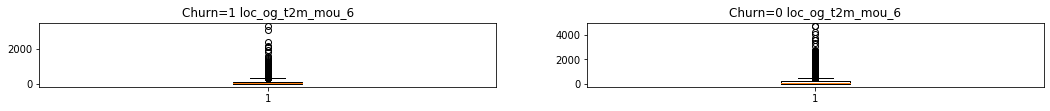

Churn=1: mean:loc_og_t2m_mou_7 = 98.28945858398886
Churn=0: mean:loc_og_t2m_mou_7 = 172.39478436308323


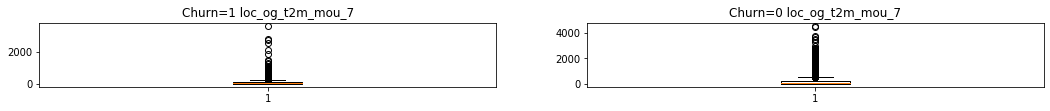

Churn=1: mean:loc_og_t2m_mou_8 = 48.08519521410585
Churn=0: mean:loc_og_t2m_mou_8 = 165.79837451622254


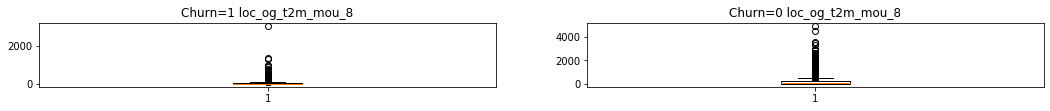

In [459]:
cols = ['loc_og_t2m_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

By similar logic as loc_og_t2t, we impute all skewed colums with thier respective medians.

In [460]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:loc_og_t2f_mou_6 = 3.8654362121876367
Churn=0: mean:loc_og_t2f_mou_6 = 6.683928123847991


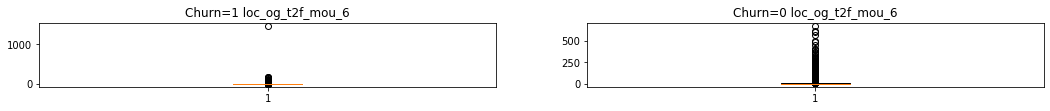

Churn=1: mean:loc_og_t2f_mou_7 = 3.0948634891254065
Churn=0: mean:loc_og_t2f_mou_7 = 6.839853774108656


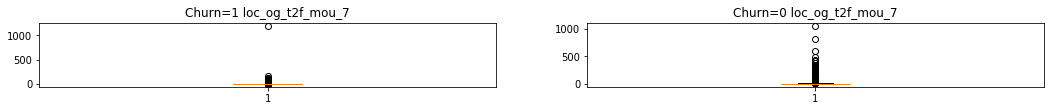

Churn=1: mean:loc_og_t2f_mou_8 = 1.667191435768262
Churn=0: mean:loc_og_t2f_mou_8 = 6.428024709734938


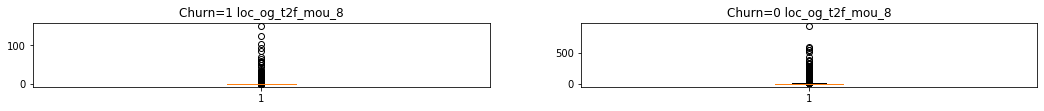

In [461]:
cols = ['loc_og_t2f_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

In [462]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:loc_og_t2c_mou_6 = 1.6811617711530056
Churn=0: mean:loc_og_t2c_mou_6 = 1.6001666052340802


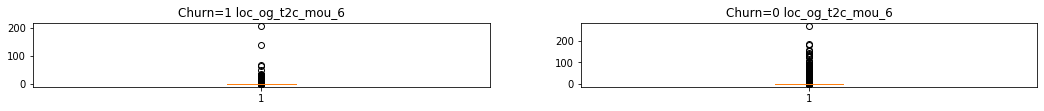

Churn=1: mean:loc_og_t2c_mou_7 = 2.200249884312819
Churn=0: mean:loc_og_t2c_mou_7 = 1.897601895383732


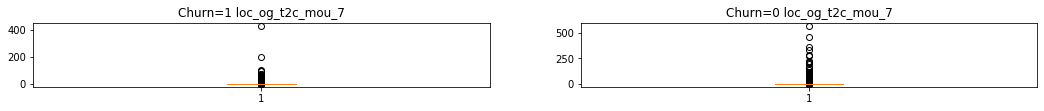

Churn=1: mean:loc_og_t2c_mou_8 = 1.3647292191435763
Churn=0: mean:loc_og_t2c_mou_8 = 1.7947075022328298


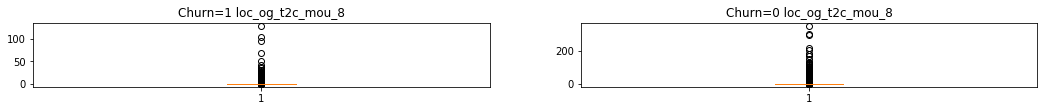

In [463]:
cols = ['loc_og_t2c_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))


As we see both mean and median is more or less similar close to zero and 1 ,this column can be dropped off,however the number of times the person makes calls to call center can be determining factor for churn as if the people are not happy with service they frequently call the call center,we can let the model decide on this.

In [464]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:std_og_t2t_mou_6 = 307.21448925909795
Churn=0: mean:std_og_t2t_mou_6 = 157.33080648728088


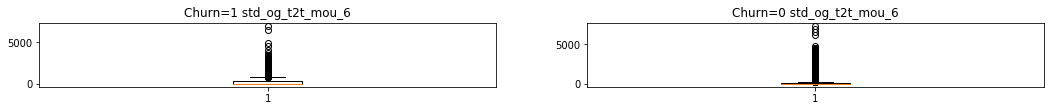

Churn=1: mean:std_og_t2t_mou_7 = 252.08761684405425
Churn=0: mean:std_og_t2t_mou_7 = 171.38172139340102


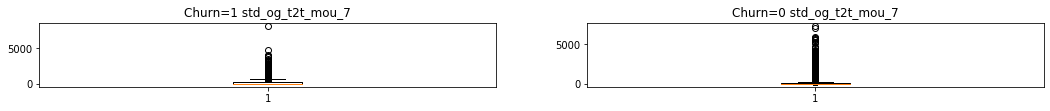

Churn=1: mean:std_og_t2t_mou_8 = 117.77415617128445
Churn=0: mean:std_og_t2t_mou_8 = 157.15077813337086


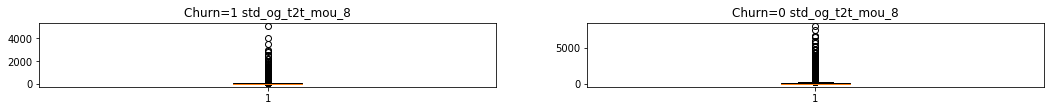

In [465]:
cols = ['std_og_t2t_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

This is interesting contrary to local calls the churned users have higher std usage for outgoing calls of this category.

In [466]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:std_og_t2m_mou_6 = 334.66402016659384
Churn=0: mean:std_og_t2m_mou_6 = 169.9731942499045


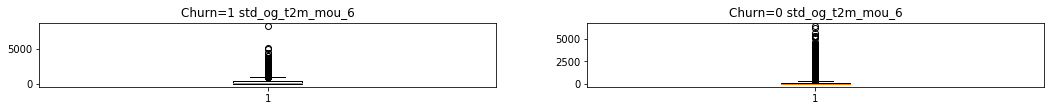

Churn=1: mean:std_og_t2m_mou_7 = 279.34260990282297
Churn=0: mean:std_og_t2m_mou_7 = 184.71798948654217


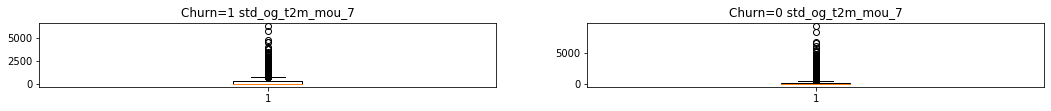

Churn=1: mean:std_og_t2m_mou_8 = 113.95238035264482
Churn=0: mean:std_og_t2m_mou_8 = 167.00735151830597


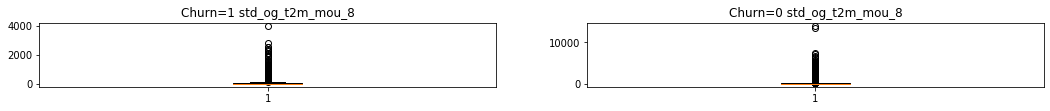

In [467]:
cols = ['std_og_t2m_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

In [468]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:std_og_t2f_mou_6 = 1.307233669443227
Churn=0: mean:std_og_t2f_mou_6 = 1.884336527828988


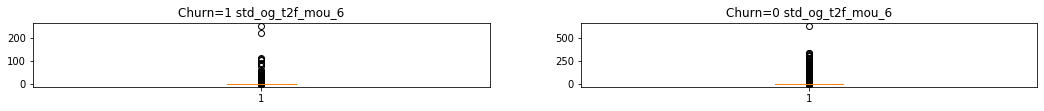

Churn=1: mean:std_og_t2f_mou_7 = 1.1854280425728843
Churn=0: mean:std_og_t2f_mou_7 = 1.9242971902417512


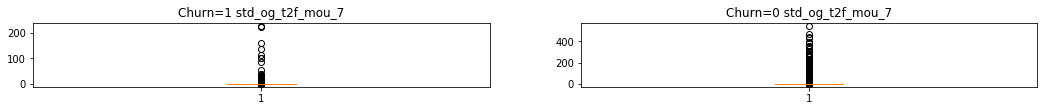

Churn=1: mean:std_og_t2f_mou_8 = 0.49849496221662476
Churn=0: mean:std_og_t2f_mou_8 = 1.7279856356058458


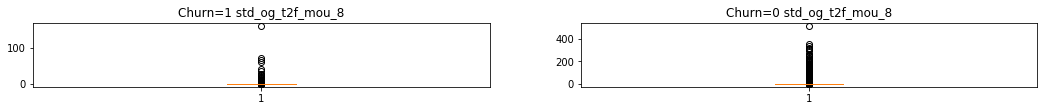

In [469]:
cols = ['std_og_t2f_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

In [470]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:isd_og_mou_6 = 4.63994300745287
Churn=0: mean:isd_og_mou_6 = 2.0112019904165233


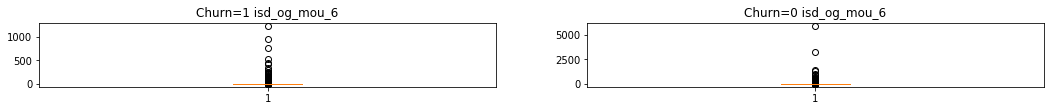

Churn=1: mean:isd_og_mou_7 = 3.2244192503470614
Churn=0: mean:isd_og_mou_7 = 2.0027364602228652


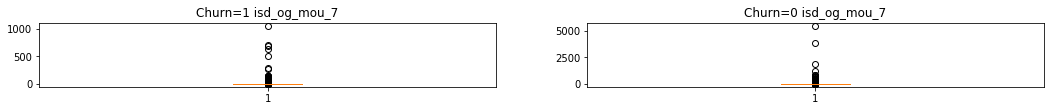

Churn=1: mean:isd_og_mou_8 = 1.6620654911838795
Churn=0: mean:isd_og_mou_8 = 1.9922335516522822


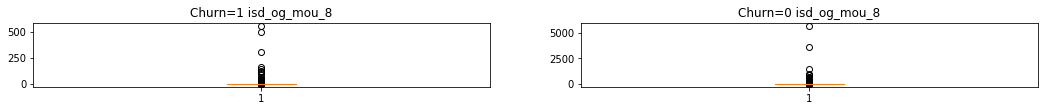

In [471]:
cols = ['isd_og_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

Although the median is 0 for all 3 months in case isd outgoing calls,however is is some difference in the means. We can impute the data with median as it is quite skewed,isd calls are slightly higher in duration in case of churn

In [472]:
high_value_customers = ImputeMedian(high_value_customers, cols)

Churn=1: mean:spl_og_mou_6 = 7.674300745287139
Churn=0: mean:spl_og_mou_6 = 5.785973461113038


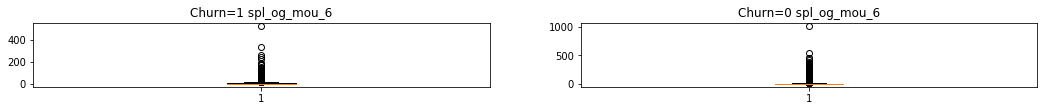

Churn=1: mean:spl_og_mou_7 = 8.114951411383608
Churn=0: mean:spl_og_mou_7 = 7.175978232702623


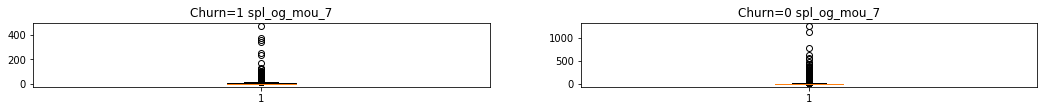

Churn=1: mean:spl_og_mou_8 = 3.9270906801007546
Churn=0: mean:spl_og_mou_8 = 6.999780440607159


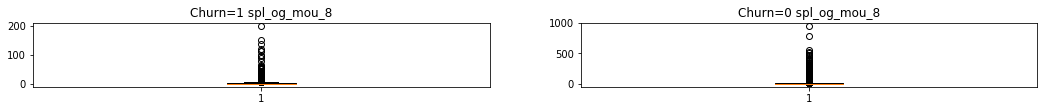

In [473]:
cols = ['spl_og_mou_'+str(m) for m in [6, 7, 8]]
BoxPlot(high_value_customers, cols, figsize=(18, 4))

In [474]:
high_value_customers = ImputeMedian(high_value_customers, cols)

In [475]:
missing_values = get_missing_value_df(high_value_customers)
missing_values.head(10)

,col,per
50,isd_ic_mou_8,3.91
32,loc_ic_mou_8,3.91
35,std_ic_t2t_mou_8,3.91
20,og_others_8,3.91
14,loc_og_mou_8,3.91
38,std_ic_t2m_mou_8,3.91
26,loc_ic_t2m_mou_8,3.91
11,roam_og_mou_8,3.91
41,std_ic_t2f_mou_8,3.91
17,std_og_mou_8,3.91


Churn=1: mean:isd_ic_mou_6 = 12.622170100832971
Churn=0: mean:isd_ic_mou_6 = 10.86366236638408


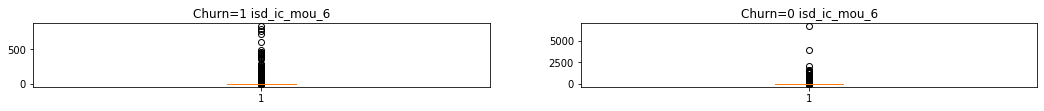

Churn=1: mean:isd_ic_mou_7 = 10.79291994447015
Churn=0: mean:isd_ic_mou_7 = 12.107161366749288


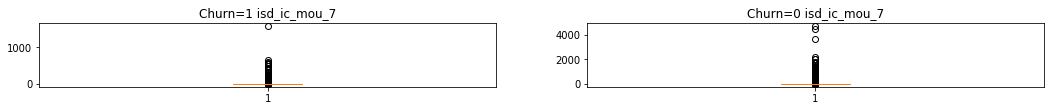

Churn=1: mean:isd_ic_mou_8 = 5.388362720403022
Churn=0: mean:isd_ic_mou_8 = 11.71818807680857


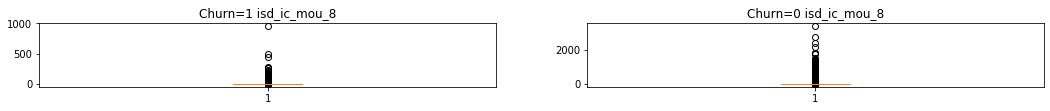

Churn=1: mean:loc_ic_mou_6 = 175.6843971942131
Churn=0: mean:loc_ic_mou_6 = 240.57973387394557


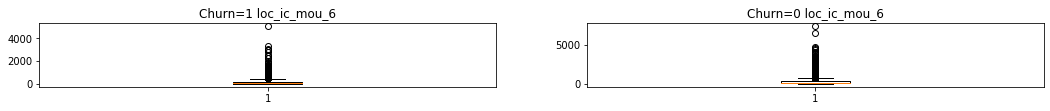

Churn=1: mean:loc_ic_mou_7 = 142.65770476631198
Churn=0: mean:loc_ic_mou_7 = 248.01877318328906


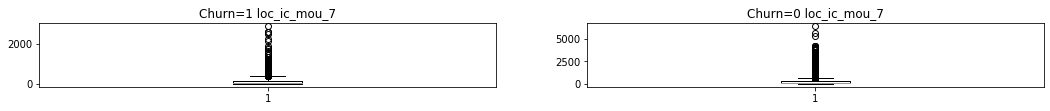

Churn=1: mean:loc_ic_mou_8 = 66.90376574307297
Churn=0: mean:loc_ic_mou_8 = 244.3654346531751


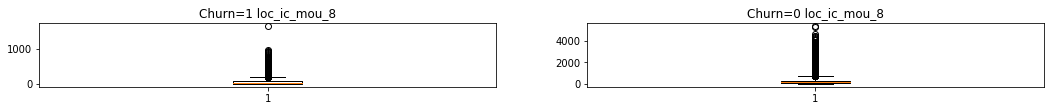

Churn=1: mean:std_ic_t2t_mou_6 = 22.53370889960551
Churn=0: mean:std_ic_t2t_mou_6 = 14.552355694802914


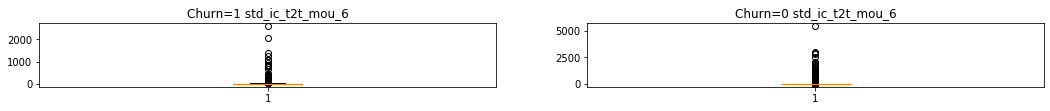

Churn=1: mean:std_ic_t2t_mou_7 = 17.26245256825548
Churn=0: mean:std_ic_t2t_mou_7 = 15.62997149520617


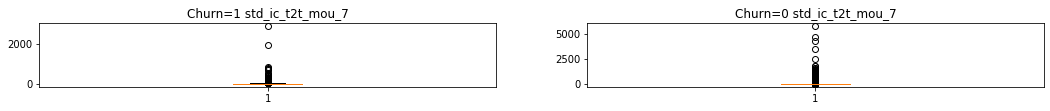

Churn=1: mean:std_ic_t2t_mou_8 = 6.682770780856423
Churn=0: mean:std_ic_t2t_mou_8 = 14.997061997618486


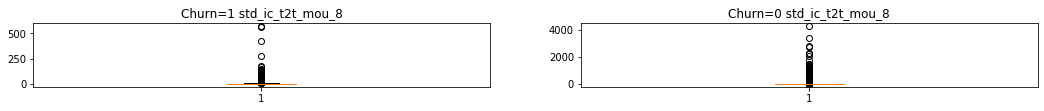

Churn=1: mean:std_ic_t2m_mou_6 = 33.36111793073215
Churn=0: mean:std_ic_t2m_mou_6 = 29.447244747512862


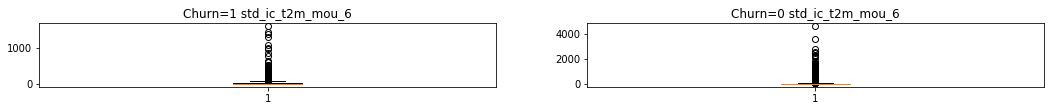

Churn=1: mean:std_ic_t2m_mou_7 = 29.212253586302644
Churn=0: mean:std_ic_t2m_mou_7 = 31.685167882131974


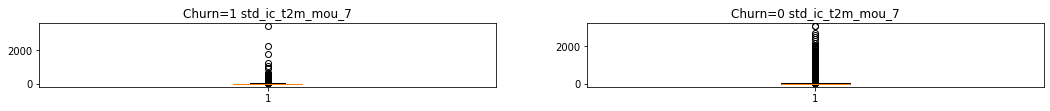

Churn=1: mean:std_ic_t2m_mou_8 = 13.957153652392973
Churn=0: mean:std_ic_t2m_mou_8 = 30.141300610301656


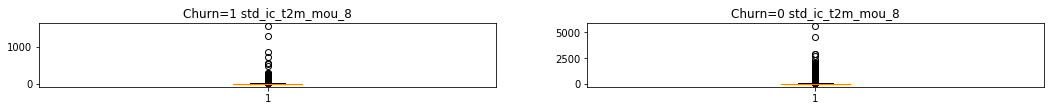

Churn=1: mean:std_ic_t2f_mou_6 = 1.7975098640946976
Churn=0: mean:std_ic_t2f_mou_6 = 2.828525985993375


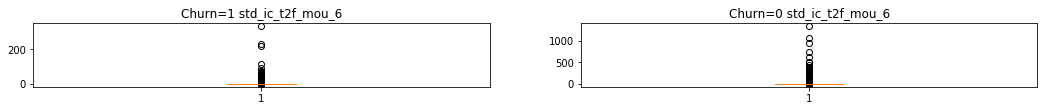

Churn=1: mean:std_ic_t2f_mou_7 = 1.7579176307265163
Churn=0: mean:std_ic_t2f_mou_7 = 2.9587765150113086


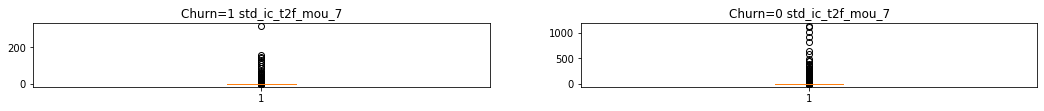

Churn=1: mean:std_ic_t2f_mou_8 = 0.7063664987405545
Churn=0: mean:std_ic_t2f_mou_8 = 2.8045303661804204


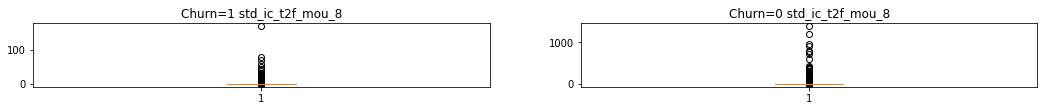

In [476]:
for c in ['isd_ic_mou_', 'loc_ic_mou_', 'std_ic_t2t_mou_', 'std_ic_t2m_mou_', 'std_ic_t2f_mou_']:
    cols = [c+str(m) for m in [6, 7, 8]]
    BoxPlot(high_value_customers, cols, figsize=(18, 4))

In [477]:
for c in ['isd_ic_mou_', 'loc_ic_mou_', 'std_ic_t2t_mou_', 'std_ic_t2m_mou_', 'std_ic_t2f_mou_']:
    cols = [c+str(m) for m in [6, 7, 8]]
    high_value_customers = ImputeMedian(high_value_customers, cols)

In [478]:
missing_values = get_missing_value_df(high_value_customers)
missing_values.head(10)

,col,per
35,spl_ic_mou_8,3.91
29,loc_ic_t2f_mou_8,3.91
14,loc_og_mou_8,3.91
23,loc_ic_t2t_mou_8,3.91
11,roam_og_mou_8,3.91
26,loc_ic_t2m_mou_8,3.91
17,std_og_mou_8,3.91
8,roam_ic_mou_8,3.91
5,offnet_mou_8,3.91
32,std_ic_mou_8,3.91


In [479]:
missing_values.col.values

array(['spl_ic_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_mou_8',
       'loc_ic_t2t_mou_8', 'roam_og_mou_8', 'loc_ic_t2m_mou_8',
       'std_og_mou_8', 'roam_ic_mou_8', 'offnet_mou_8', 'std_ic_mou_8',
       'onnet_mou_8', 'og_others_8', 'std_ic_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_t2m_mou_6', 'spl_ic_mou_6', 'loc_ic_t2t_mou_6',
       'onnet_mou_6', 'roam_og_mou_6', 'loc_og_mou_6', 'offnet_mou_6',
       'roam_ic_mou_6', 'og_others_6', 'std_og_mou_6', 'loc_og_mou_7',
       'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'roam_og_mou_7',
       'og_others_7', 'loc_ic_t2f_mou_7', 'roam_ic_mou_7', 'std_ic_mou_7',
       'offnet_mou_7', 'std_og_mou_7', 'spl_ic_mou_7', 'onnet_mou_7'],
      dtype=object)

In [480]:
cols = missing_values.col.values
uniq_cols = set()
for c in cols:
    uniq_cols.add('_'.join(c.split('_')[0:-1])+"_")
uniq_cols

{'loc_ic_t2f_mou_',
 'loc_ic_t2m_mou_',
 'loc_ic_t2t_mou_',
 'loc_og_mou_',
 'offnet_mou_',
 'og_others_',
 'onnet_mou_',
 'roam_ic_mou_',
 'roam_og_mou_',
 'spl_ic_mou_',
 'std_ic_mou_',
 'std_og_mou_'}

In [481]:
cols_to_impute = []
for c in uniq_cols:
    cols = [c+str(m) for m in [6, 7, 8]]
    for ci in cols:
        try:
            mean_of_classes(high_value_customers, ci)
            cols_to_impute.append(ci)
        except Exception as e:
            print(e)
            pass

Churn=1: mean:loc_og_mou_6 = 188.1254099079355
Churn=0: mean:loc_og_mou_6 = 264.87813601180176
Churn=1: mean:loc_og_mou_7 = 149.87863001351982
Churn=0: mean:loc_og_mou_7 = 268.91608537393125
Churn=1: mean:loc_og_mou_8 = 73.49175609756092
Churn=0: mean:loc_og_mou_8 = 255.85945764711118
Churn=1: mean:std_ic_mou_6 = 57.69637001315207
Churn=0: mean:std_ic_mou_6 = 46.831746406192394
Churn=1: mean:std_ic_mou_7 = 48.05301487156368
Churn=0: mean:std_ic_mou_7 = 50.11633134789332
Churn=1: mean:std_ic_mou_8 = 21.458085365853677
Churn=0: mean:std_ic_mou_8 = 47.71295088611356
Churn=1: mean:loc_ic_t2m_mou_6 = 116.53852257781647
Churn=0: mean:loc_ic_t2m_mou_6 = 156.333575746402
Churn=1: mean:loc_ic_t2m_mou_7 = 93.59543938711109
Churn=0: mean:loc_ic_t2m_mou_7 = 159.4435822486911
Churn=1: mean:loc_ic_t2m_mou_8 = 44.39848170731709
Churn=0: mean:loc_ic_t2m_mou_8 = 158.7792207361514
Churn=1: mean:offnet_mou_6 = 503.40043402016573
Churn=0: mean:offnet_mou_6 = 370.3718039071251
Churn=1: mean:offnet_mou_7 = 

In [482]:
cols_to_impute

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8']

In [483]:
high_value_customers = ImputeMedian(high_value_customers, cols_to_impute)

We can drop std_og_mou 6 ,7 ,8 as they are just the total of all std outgoing we already have individual attributes of interest

In [484]:
high_value_customers = high_value_customers.drop(['std_og_mou_7','std_og_mou_6','std_og_mou_8'],axis = 1)

We as well do not onnet_mou_6 and onnet_mou_7 and onnet_mou_8 as well as offnet_mou_6 7 8 for any of them

In [485]:
high_value_customers = high_value_customers.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8'],axis =1 )

Further we can drop the attributes corresponding to total calls,as they are just the sum of columns corresponding to ouutgoing calls

In [486]:
high_value_customers = high_value_customers.drop(['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'],axis = 1)

We can also get rid of the variables corressponding to total minutes of outgoing calls ,as they are already redundant since we have the minutes for individual months


In [487]:
high_value_customers = high_value_customers.drop(['total_og_mou_6','total_og_mou_7','total_og_mou_8'],axis = 1)

These attributes are redundant,they can be dropped as already the individual category values are present.These are basically the sum of individual categories of incoming calls of month 6,7,8

In [488]:
attributes = ['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8']
high_value_customers = high_value_customers.drop(attributes,axis = 1)

The total attributes which can be dropped are as they are the total calls of their groups they can be dropped
Since they are taken care of individual groups

In [489]:
attributes = ['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
high_value_customers = high_value_customers.drop(attributes,axis =1)

In [490]:
missing_values = get_missing_value_df(high_value_customers)
missing_values.head(10)

,col,per


All the missing values are handled at this point.

In [491]:
high_value_customers.shape

(29953, 115)

In [492]:
# from IPython.display import Javascript
# display(Javascript('IPython.notebook.execute_cells_above()'))

#### Outlier treatment
First we check if the coulmns which are not strictly float have outliers or not.The outlier is defined as any observation which is more than 2 stardard deviation away from mean.We take this instead of percentile because many values would be zero even at high percentiles.The lower bound is ignored as all the columns will have lower bounds close to 0 ,practically in real time.So it cannot be considered as outlier.

In [198]:
import re
def isStrictlyFloat(s):
    if re.match("^\d+\.\d+$", s) is None:
        return False
    else:
        return True

strictly_float = []
for i in high_value_customers.columns:
     c = list(filter(lambda x:isStrictlyFloat(str(x)), high_value_customers[i]))
     if len(c)>0:
        strictly_float.append(i)
print(len(strictly_float))

89


In [199]:
non_float_cols = [c for c in high_value_customers.columns if c not in strictly_float]
pretty_print_cols_list(non_float_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7']
['total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6']
['last_day_rch_amt_7', 'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7']
['monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon']
['churn']


In [200]:
pretty_print_cols_list([f'{c}:{high_value_customers[c].nunique()}' for c in non_float_cols])

['total_rech_num_6:102', 'total_rech_num_7:101', 'total_rech_num_8:96', 'total_rech_amt_6:2298', 'total_rech_amt_7:2316']
['total_rech_amt_8:2304', 'max_rech_amt_6:172', 'max_rech_amt_7:161', 'max_rech_amt_8:182', 'last_day_rch_amt_6:156']
['last_day_rch_amt_7:152', 'last_day_rch_amt_8:181', 'monthly_2g_6:5', 'monthly_2g_7:6', 'monthly_2g_8:6']
['sachet_2g_6:31', 'sachet_2g_7:35', 'sachet_2g_8:34', 'monthly_3g_6:12', 'monthly_3g_7:15']
['monthly_3g_8:12', 'sachet_3g_6:25', 'sachet_3g_7:27', 'sachet_3g_8:29', 'aon:3294']
['churn:2']


Here we see all the columns which have some or other integer values have outliers more than 2 standard deviations away. We can leave aside churn column. None of them are categorical, they have atleast 5 integral values.

In [201]:
#This function removes the outliers.Instead of discarding outliers at every column of data,outliers 
#are thrown for the observations where there are more than 10 columns whose corresponding values are more
#than 2 standard deviations away from their mean.Individual columns are not considered while reving outliers
#as there are many columns and will lead to huge loss of data .If an observation has more than 10 columns as outliers then its indedd
#an outlier since its a very huge multi dimensional space
def remove_outliers(df):
    nrows = df.shape[0]
    indexes_to_be_dropped = []
    for i in range(0,nrows):
        count = 0
        for col in df.columns:
            if df[col].iloc[[i]].values[0] >np.mean(df[col])+2*np.std(df[col]):
                count = count+1
            if count >10:
                indexes_to_be_dropped.append(i)
                break
    return indexes_to_be_dropped

In [202]:
indexes_tobedropped = remove_outliers(high_value_customers)
len(indexes_tobedropped)

1351

In [203]:
# df_ints = churn_dataset_filtered_train[t]
# #print(df_ints.describe())
# low_max = []
# for i in t:
#      if max(df_ints[i]) > 2*np.std(df_ints[i])+np.mean(df_ints[i]):
#        low_max.append(i) 
# print(low_max)
# print(len(low_max))

#### EDA

In [204]:
# get all mou columns and look at their correlations
mou_cols = [c for c in high_value_customers.columns if 'mou' in c]
pretty_print_cols_list(mou_cols)

['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7']
['roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6']
['loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8']
['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7']
['std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6']
['std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8']
['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7']
['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6']
['loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8']
['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7']
['std_ic_t2f_mou_8', 'spl_ic_mou

Here we will also derive new features for attributes corressponding to months 6 7 8 by taking their averages

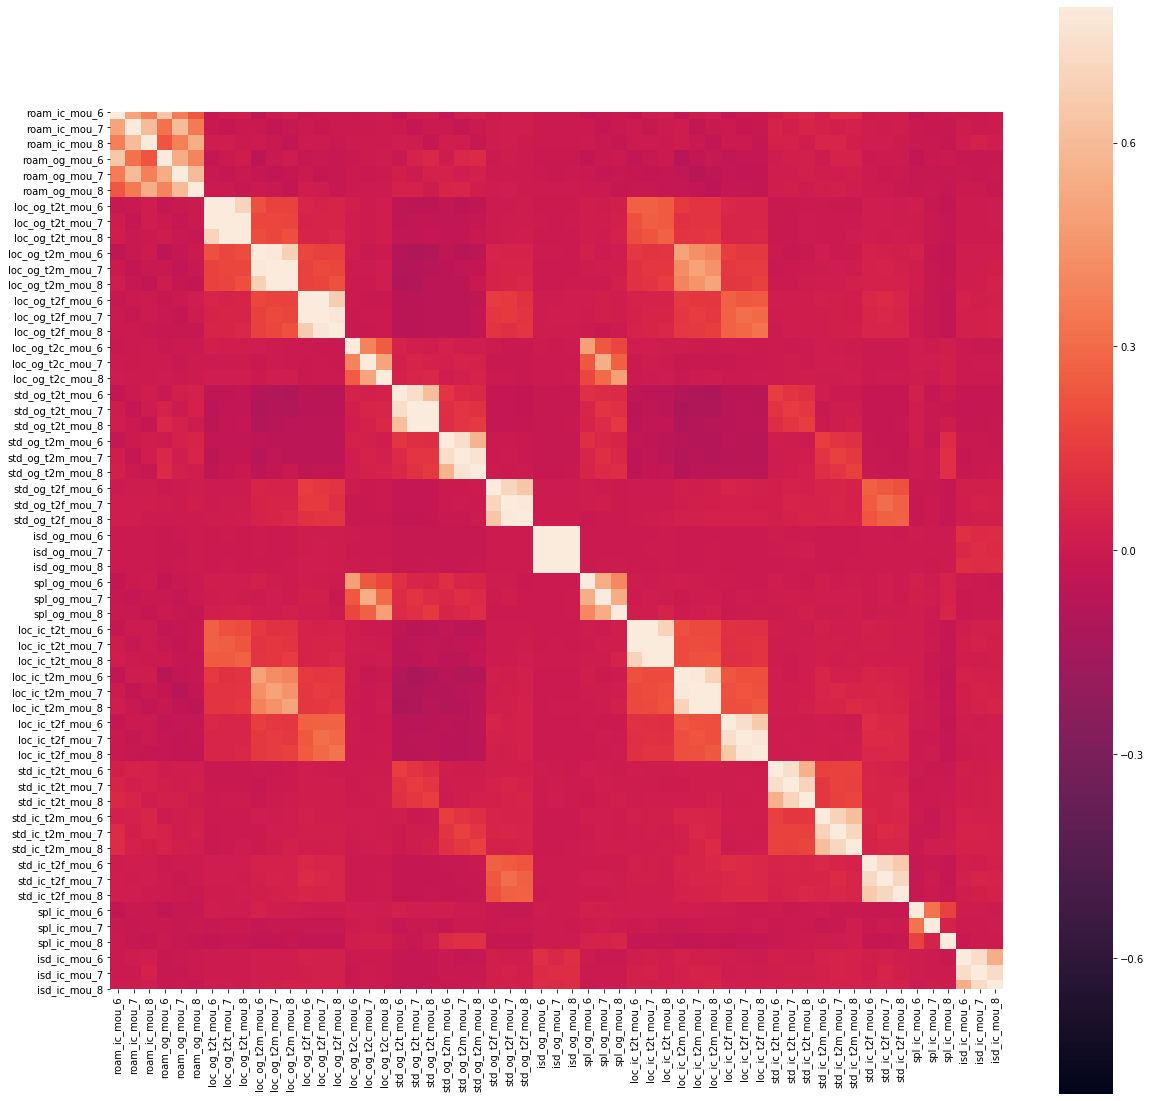

In [205]:
corr = high_value_customers[mou_cols].corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax)
plt.show()

Its clear that 6, 7, 8 months corresponding mou's are mostly related. We can form new columns by combining each into a total mou.


In [206]:
mous_month_6 = [c.split('_6')[0] for c in mou_cols if '_6' in c]

for c in mous_month_6:
    high_value_customers[c] = (high_value_customers[c+'_6'] + high_value_customers[c+'_7'] + high_value_customers[c+'_8']) / 3

In [207]:
# look at amounts columns
amnts_cols = [c for c in high_value_customers.columns if 'amt' in c]
pretty_print_cols_list(amnts_cols)

['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7']
['max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'av_rech_amt_data_6']
['av_rech_amt_data_7', 'av_rech_amt_data_8', 'avg_recharge_amt']


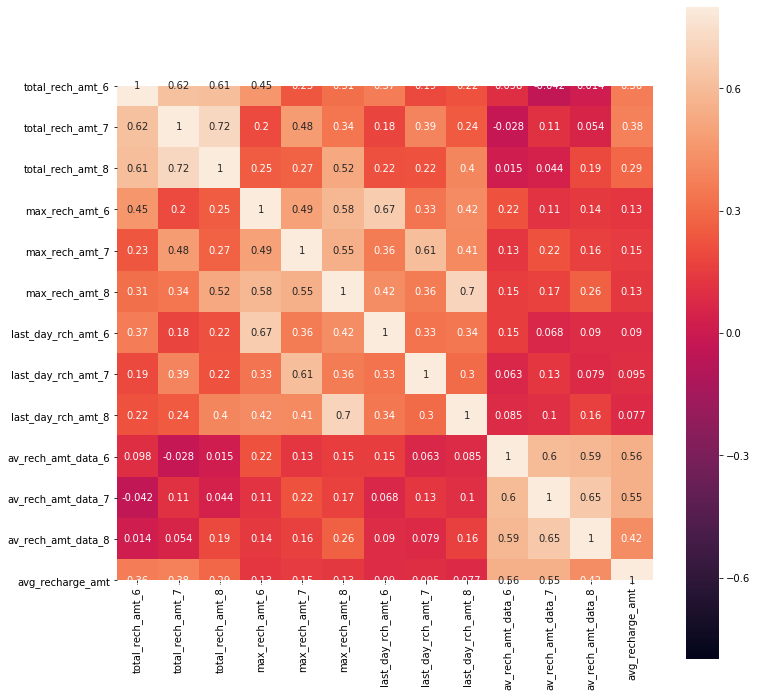

In [208]:
corr = high_value_customers[amnts_cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [209]:
c = 'av_rech_amt_data'
high_value_customers[c] = (high_value_customers[c+'_6'] + high_value_customers[c+'_7'] + high_value_customers[c+'_8'])/3

In [210]:
# lets look at count columns
count_cols = [c for c in high_value_customers.columns if 'count' in c]
pretty_print_cols_list(count_cols)

['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7']
['count_rech_3g_8']


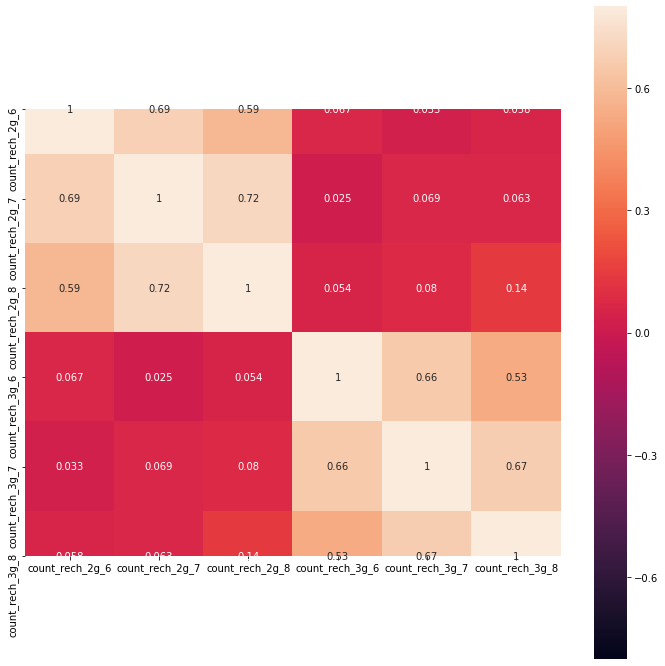

In [211]:
corr = high_value_customers[count_cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [212]:
high_value_customers['count_rec_2g'] = (high_value_customers['count_rech_2g_6'] + \
                            high_value_customers['count_rech_2g_7'] + high_value_customers['count_rech_2g_8']) / 3

high_value_customers['count_rec_3g'] = (high_value_customers['count_rech_3g_6'] + \
                            high_value_customers['count_rech_3g_7'] + high_value_customers['count_rech_3g_8']) / 3

In [213]:
# lets look at monthly columns
monthly_cols = [c for c in high_value_customers.columns if 'monthly' in c]
pretty_print_cols_list(monthly_cols)

['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7']
['monthly_3g_8']


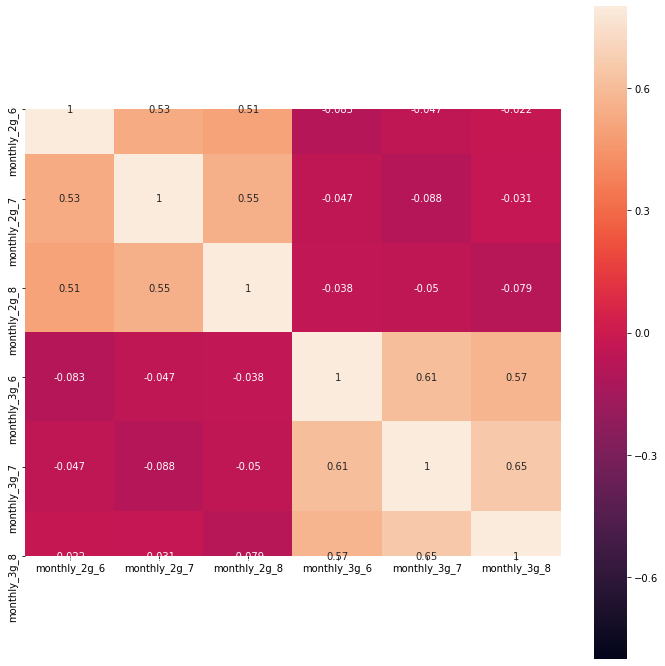

In [214]:
corr = high_value_customers[monthly_cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [215]:
high_value_customers[monthly_cols].describe()

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,0.174473,0.183187,0.153541,0.218075,0.229359,0.211264
std,0.435021,0.450466,0.406481,0.613612,0.659575,0.617885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000,14.000000,16.000000,16.000000


In [216]:
high_value_customers['monthly_2g_6'].value_counts()

0    25355
1     4012
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64

In [217]:
high_value_customers['monthly_2g_7'].value_counts()

0    25204
1     4060
2      649
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64

In [218]:
high_value_customers['monthly_3g_6'].value_counts()

0     25295
1      3430
2       852
3       237
4        76
5        34
6        12
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64

Looks like these are categorical columns or possibly just integral columns. Lets not touch these.

In [219]:
# look at others columns
other_cols = [c for c in high_value_customers.columns if 'other' in c]
pretty_print_cols_list(other_cols)

['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7']
['ic_others_8']


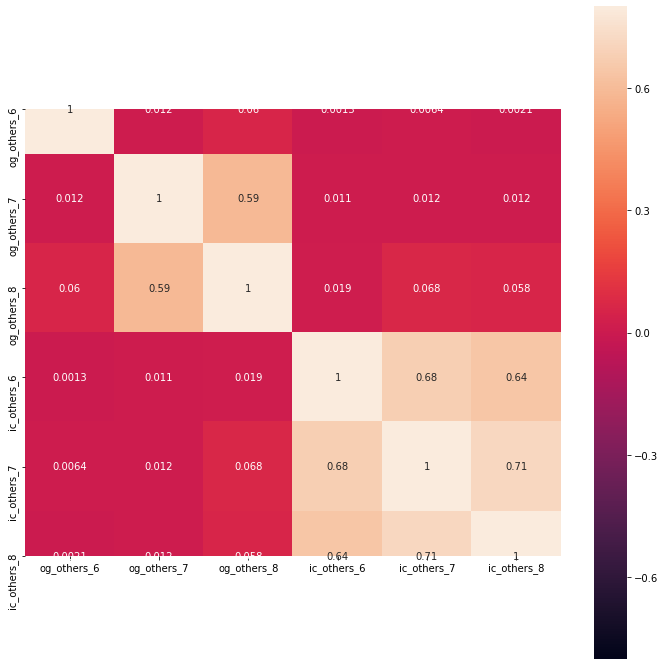

In [220]:
corr = high_value_customers[other_cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [223]:
c = 'ic_others'
high_value_customers[c] = (high_value_customers[c+'_6'] + high_value_customers[c+'_7'] + high_value_customers[c+'_8']) / 3

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\seaborn\matrix.py:287: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\seaborn\matrix.py:287: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


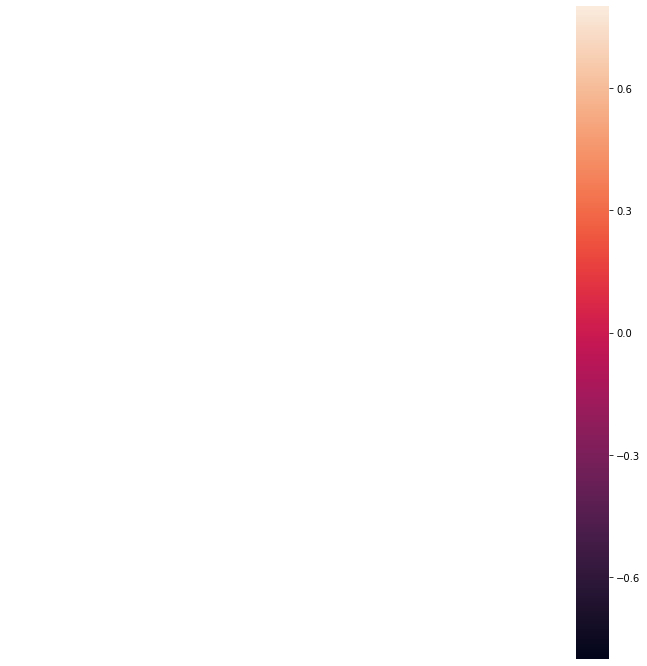

In [403]:
# lets look at rech_data columns
cols = [c for c in high_value_customers.columns if 'rech_data' in c]
corr = high_value_customers[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [225]:
new_cols = [c.split('_6')[0] for c in cols if '_6' in c]
for c in new_cols:
    high_value_customers[c] = (high_value_customers[c+'_6'] + high_value_customers[c+'_7'] + high_value_customers[c+'_8'])/3

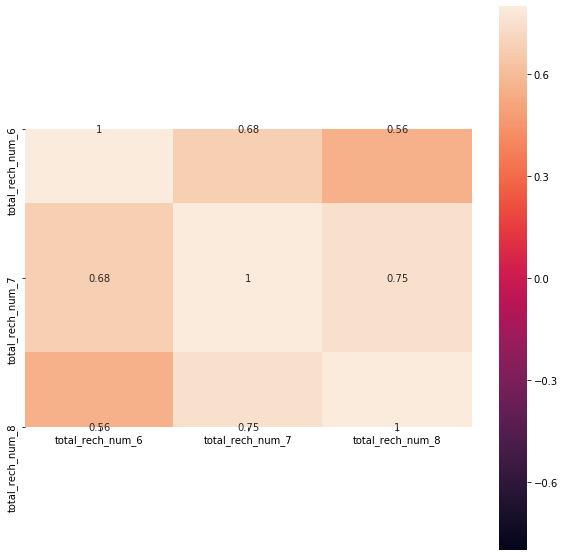

In [226]:
# lets look at rech_num columns
cols = [c for c in high_value_customers.columns if 'rech_num' in c]
corr = high_value_customers[cols].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [227]:
new_cols = [c.split('_6')[0] for c in cols if '_6' in c]
for c in new_cols:
    high_value_customers[c] = (high_value_customers[c+'_6'] + high_value_customers[c+'_7'] + high_value_customers[c+'_8']) / 3

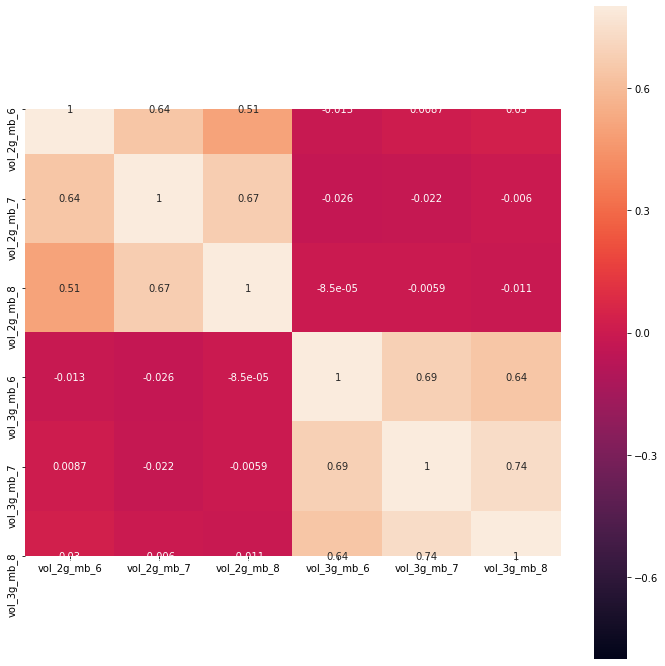

In [228]:
# lets look at vol columns
cols = [c for c in high_value_customers.columns if 'vol_' in c]
corr = high_value_customers[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [229]:
new_cols = [c.split('_6')[0] for c in cols if '_6' in c]
for c in new_cols:
    high_value_customers[c] = (high_value_customers[c+'_6'] + high_value_customers[c+'_7'] + high_value_customers[c+'_8']) / 3

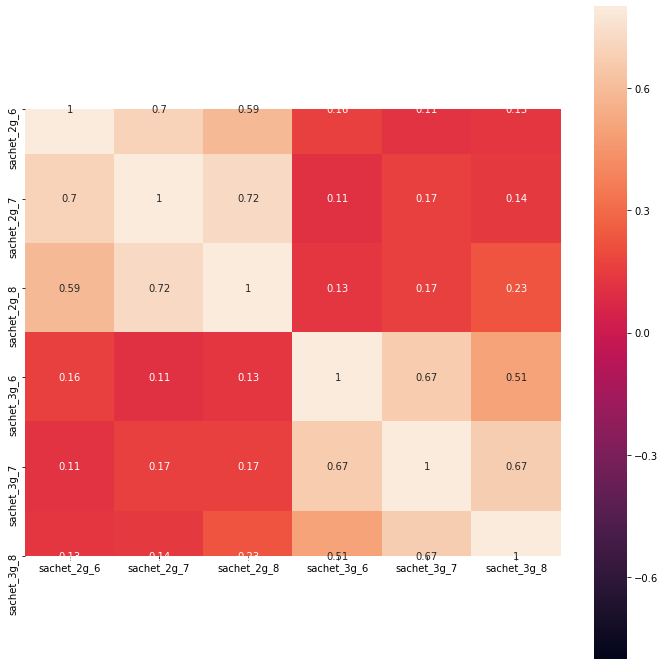

In [230]:
# lets look at sachet columns
cols = [c for c in high_value_customers.columns if 'sachet' in c]
corr = high_value_customers[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [231]:
high_value_customers[cols].describe()

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,1.067439,1.215538,1.055754,0.209662,0.227790,0.202451
std,2.508864,2.737921,2.537308,0.986408,1.090717,1.100735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,42.000000,48.000000,44.000000,29.000000,35.000000,41.000000


In [232]:
high_value_customers['sachet_2g_6'].value_counts()

0     21215
1      3095
2      1504
3       939
4       742
5       516
6       444
7       339
8       291
9       229
10      194
11      119
12      111
13       53
14       44
15       28
17       18
16       16
19       13
18       13
22        7
20        6
21        5
24        3
25        3
30        1
39        1
34        1
42        1
27        1
32        1
Name: sachet_2g_6, dtype: int64

These are categorical, don't touch them.

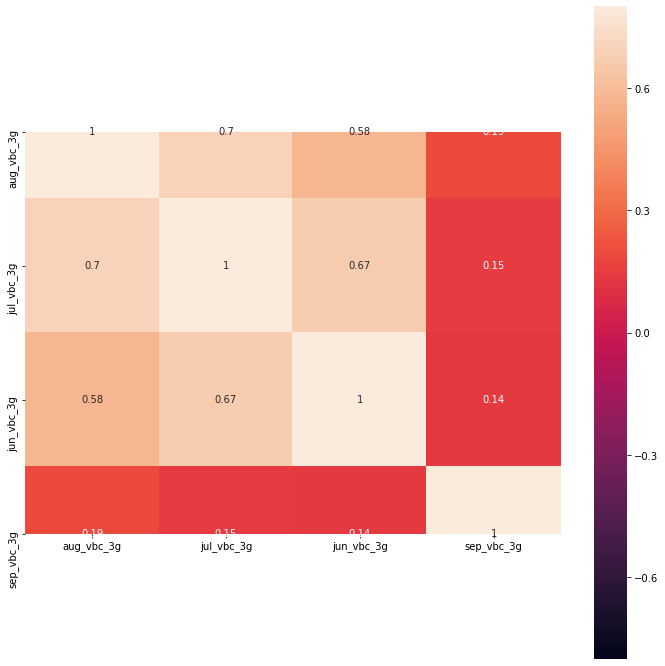

In [233]:
# lets look at vbc  columns
cols = [c for c in high_value_customers.columns if 'vbc_' in c]
corr = high_value_customers[cols].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

In [234]:
# drop sept vbc
high_value_customers = high_value_customers.drop(columns=['sep_vbc_3g'])

In [235]:
cols = [c for c in high_value_customers.columns if 'vbc_' in c]
cols

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [236]:
high_value_customers[cols].describe()

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,29953.000000,29953.000000,29953.000000
mean,169.276670,179.057629,158.731865
std,421.128001,443.756247,416.989501
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,129.130000,137.860000,98.750000
max,12916.220000,9165.600000,11166.210000


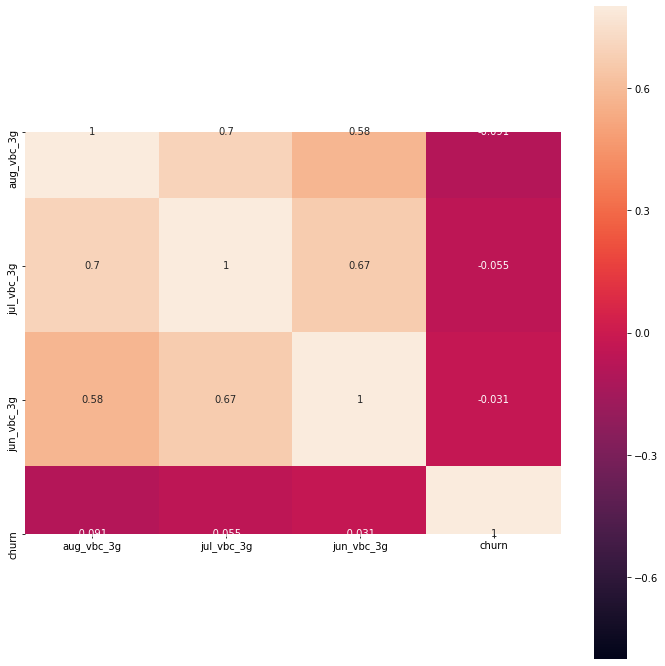

In [237]:
# lets look at vbc  columns
corr = high_value_customers[cols + ['churn']].corr()
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True, vmin=-0.8, vmax=0.8, ax=ax, annot=True)
plt.show()

No relation seen, and the values are skewed. Better to drop them.

In [238]:
high_value_customers = high_value_customers.drop(columns=cols)

In [239]:
high_value_customers['total_data_rech_month_8'] = (high_value_customers['count_rech_2g_8']+high_value_customers['count_rech_3g_8'])*high_value_customers['av_rech_amt_data_8']

Now we can dervive some new feature.Firstly the difference between the average recharge talktime amount of 6 and 7 months and talktime amount of month 8.Same goes with data too the difference in average data recharge of 6 and 7 month per customer and
data recharge of month 8

In [240]:
high_value_customers['derive_diff_tktime_67n8'] = (high_value_customers['total_rech_amt_6']+high_value_customers['total_rech_amt_7'])/2 -high_value_customers['total_rech_amt_8']
high_value_customers['derive_diff_data_67n8'] = (high_value_customers['total_data_rech_month_6']+high_value_customers['total_data_rech_month_7'])/2 -high_value_customers['total_data_rech_month_8']

The difference in the average number of normal talktime recharges of months 6 and 7 versus recharge of month 8. Also the differnce in the average number of data recharges of months 6 and 7 with the recharge of month 8 

In [241]:
high_value_customers['derive_diff_tktime_count_67n8'] = (high_value_customers['total_rech_num_6']+high_value_customers['total_rech_num_7'])/2 -high_value_customers['total_rech_num_8']
high_value_customers['derive_diff_data_count_67n8'] = (high_value_customers['count_rech_2g_6']+high_value_customers['count_rech_3g_6']+high_value_customers['count_rech_2g_7']+high_value_customers['count_rech_3g_7'])/2 -(high_value_customers['count_rech_2g_8']+high_value_customers['count_rech_3g_8'])

In [404]:
#save the final data after EDA in seperate file.
high_value_customers.to_csv('HighValueCustomers.csv')

### Modelling

In [405]:
high_value_customers = pd.read_csv('HighValueCustomers.csv')
high_value_customers = high_value_customers.drop(['Unnamed: 0'],axis = 1)

In [382]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import IncrementalPCA
import seaborn as snb
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

In [245]:
def draw_roc( actual, predicted ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, predicted,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, predicted )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [370]:
X = high_value_customers.drop(columns=['churn'])
y = high_value_customers['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)

(20967, 140)
(8986, 140)


#### Scaling

In [371]:
# Scaling
scaler = StandardScaler()
X_train_processed = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_processed = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Model for prediction with PCA

In [372]:
X_train = X_train_processed.copy()
X_test = X_test_processed.copy()

#### PCA

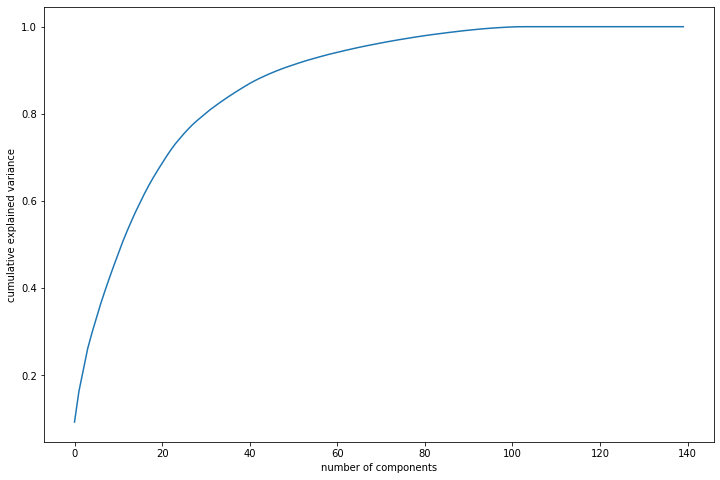

In [280]:
pca = PCA(svd_solver='randomized', random_state=42)

pca.fit(X_train)

# scree plot
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can pick number of components sufficient to explain more than 95% variance.

In [281]:
num_pca_components = master_df.shape[1]
for i, val in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    if val >= 0.95:
        num_pca_components = i
        break
print(num_pca_components)  

64


In [282]:
#however we can take incremental PCA to get the values of data corresponding to new components
#pca = IncrementalPCA(n_components=num_pca_components)
pca = IncrementalPCA(n_components=num_pca_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [283]:
correlation_mat = np.corrcoef(X_train.transpose())

In [284]:
corrmat_nodiag = correlation_mat - np.diagflat(correlation_mat.diagonal())
print(np.max(corrmat_nodiag))
print(np.min(corrmat_nodiag))
correlation_mat.shape

0.02818031335545045
-0.021376990502980826


(64, 64)

Here PCA has done well in getting rid of correlated components.

Now comes the modelling part .Lets start on with Logistic Regression.

In [285]:
#To resolve the problem of class imbalance we can use balanced tag in the model as it increses the weightage of errors
#on negative points in loss function
learner_pca = LogisticRegression(random_state=0, class_weight='balanced')
model_pca = learner_pca.fit(X_train, y_train)

In [286]:
#Now lets check the model on training data first with default cutt off of 0.5
pred_prob_train = model_pca.predict_proba(X_train)[:,1]
churn_pred = pd.Series(pred_prob_train).map(lambda x:1 if x>0.5 else 0)

In [287]:
def print_results(actual, predicted):
    confusion = metrics.confusion_matrix(actual, predicted)
    print("Confusion matrix:\n", confusion)
    print(f'Recall: {metrics.recall_score(actual, predicted)}')
    print(f'Accuracy: {metrics.accuracy_score(actual, predicted)}')
    print(f'Specificity: {confusion[0,0]/(confusion[0,0]+confusion[0,1])}')

In [288]:
print_results(y_train, churn_pred)

Confusion matrix:
 [[15302  3913]
 [  312  1440]]
Recall: 0.821917808219178
Accuracy: 0.7984928697476987
Specificity: 0.7963570127504553


It has overall 79.84% accuracy with sensitivity being 82.19% and specificity being 79.63% 

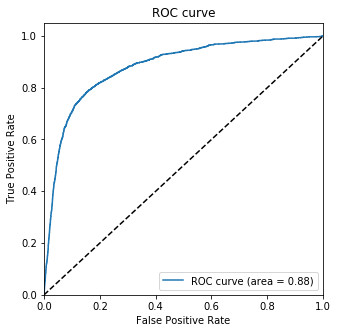

In [289]:
draw_roc(y_train, pred_prob_train)

The roc curve is good with area being 0.88.It is a pretty decent model.However lets see if we can do better on sensitivity. As predicting churn correctly is more critical than false prediction

In [290]:
#Run in loop the various cuttoffs from 0.2 to 0.5 and choose the right set of metrics
for cutoff in [0.5,0.45,0.4,0.35,0.3,0.25,0.2]:
    churn_pred = pd.Series(pred_prob_train).map(lambda x:1 if x>cutoff else 0)
    print(f'===Cut Off: {cutoff}===')
    print_results(y_train, churn_pred)

===Cut Off: 0.5===
Confusion matrix:
 [[15302  3913]
 [  312  1440]]
Recall: 0.821917808219178
Accuracy: 0.7984928697476987
Specificity: 0.7963570127504553
===Cut Off: 0.45===
Confusion matrix:
 [[14579  4636]
 [  273  1479]]
Recall: 0.8441780821917808
Accuracy: 0.7658701769447227
Specificity: 0.7587301587301587
===Cut Off: 0.4===
Confusion matrix:
 [[13757  5458]
 [  228  1524]]
Recall: 0.8698630136986302
Accuracy: 0.7288119425764297
Specificity: 0.7159510798855061
===Cut Off: 0.35===
Confusion matrix:
 [[12869  6346]
 [  185  1567]]
Recall: 0.894406392694064
Accuracy: 0.6885105165259694
Specificity: 0.6697371844912828
===Cut Off: 0.3===
Confusion matrix:
 [[11788  7427]
 [  156  1596]]
Recall: 0.910958904109589
Accuracy: 0.6383364334430295
Specificity: 0.6134790528233152
===Cut Off: 0.25===
Confusion matrix:
 [[10617  8598]
 [  120  1632]]
Recall: 0.9315068493150684
Accuracy: 0.5842037487480326
Specificity: 0.5525370804059329
===Cut Off: 0.2===
Confusion matrix:
 [[9276 9939]
 [  97 

We see that sensitivity keeps increasing as cutt off drops.0.45 seems to be an optimal model for given set of cuttoffs as recall is quite high,however that comes at the price of specificity dropping to 76%.Increasing the cutt off further does not improve sensitivity much but rather drops accuracy and specificity significantly


In [291]:
pred_prob_test = model_pca.predict_proba(X_test)[:,1]
churn_pred_test = pd.Series(pred_prob_test).map(lambda x:1 if x>=0.45 else 0)
print_results(y_test, churn_pred_test)

Confusion matrix:
 [[6208 2097]
 [  97  584]]
Recall: 0.8575624082232012
Accuracy: 0.755842421544625
Specificity: 0.7475015051173992


The model seems to be doing good in a similar way on test data as well with good sensitivity score and model metrics are also
stable when compared to metrics on training data.There is no evidence of overfitting

Now lets build another model using SVms

In [294]:
svc_model = SVC(C=10,kernel = 'linear',class_weight='balanced')
svc_model.fit(X_train, y_train)
pred_svm = svc_model.predict(X_train)

In [300]:
#print(metrics.confusion_matrix(y_train,pred_svm))

print_results(y_train, pred_svm)

Confusion matrix:
 [[15784  3431]
 [  336  1416]]
Recall: 0.8082191780821918
Accuracy: 0.8203367196070015
Specificity: 0.8214415820973198


In [301]:
pred_svm_test = svc_model.predict(X_test)
#print(metrics.accuracy_score(y_test, pred_svm_test))
#print(metrics.recall_score(y_test, pred_svm_test))
print_results(y_test, pred_svm_test)

Confusion matrix:
 [[6756 1549]
 [ 117  564]]
Recall: 0.8281938325991189
Accuracy: 0.8146004896505675
Specificity: 0.813485851896448


SVM is providing accuracy of 81.4% and recall of 82.8%.The model also is stable and able to generalize since the test score 
is comparable to train score.However lets try grid search to see if anything better can be done

We can target gris seaarch to find optimal set of parameters.the scoring measure would be recall as sensitivity is important.
Though the model will fill find hyperplane which seperates the classes ,the one with highest recall we will consider.

Note-All results obtain from grid search here after are saved into csv files on disk ,so that thy can easily be loaded
when results are required as grid search is computationally expensive

In [402]:
#First lets target accuracy and see how the model performs
folds = KFold(n_splits = 5,shuffle = True,random_state = 4)
hyperparameters = [{'gamma' :[0.001,0.01,0.05,0.1,0.5,10,30,50,100],'C':[10,15,20,25,30,50,100]}]
model_svc = SVC(kernel = "rbf",class_weight='balanced')  
model_grid_search = GridSearchCV(estimator = model_svc,param_grid = hyperparameters,scoring = 'accuracy',cv = folds,verbose = 1,return_train_score = True)
model_grid_search.fit(X_train,y_train)

In [ ]:
model_summary = pd.DataFrame(model_grid_search.cv_results_)
#print(model_summary)
model_summary.to_csv('svm_model.csv')

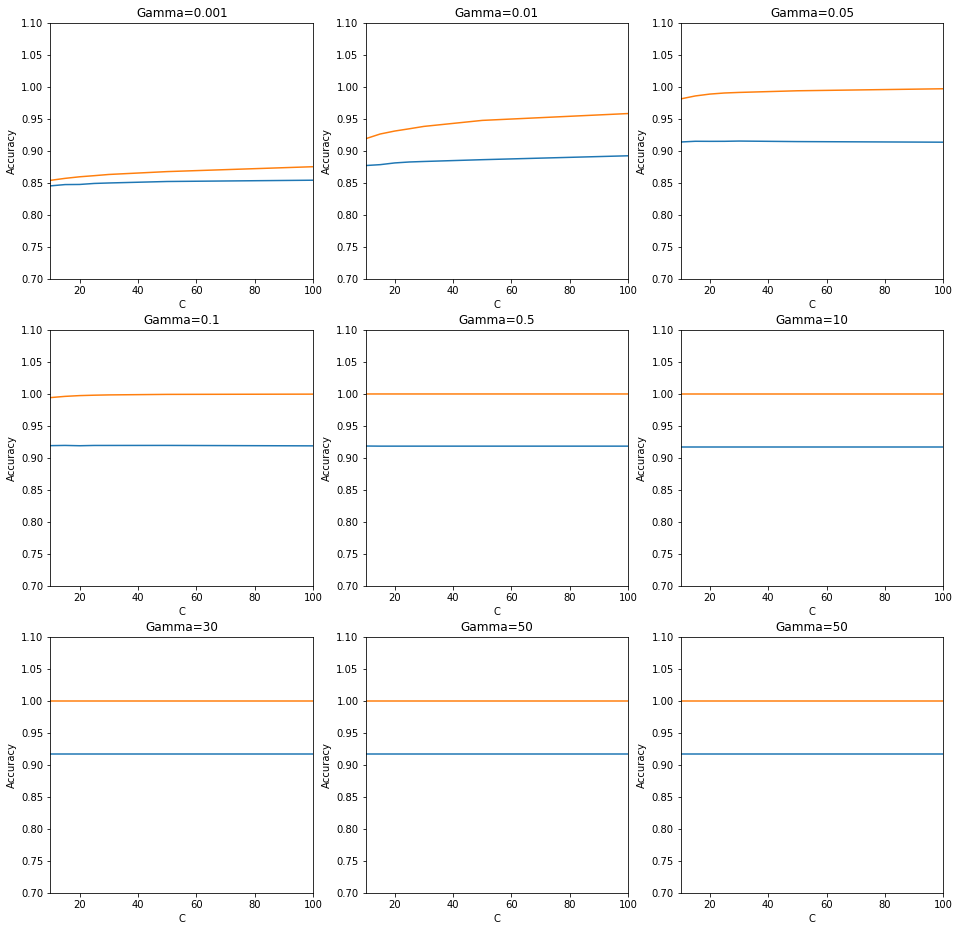

In [407]:
model_summary = pd.read_csv('svm_model.csv')
fig = plt.figure(figsize=(16,16))
fig.tight_layout()
gamma =[0.001,0.01,0.05,0.1,0.5,10,30,50,100]
count = 1
for i in gamma:
    gamma_filter = model_summary[model_summary['param_gamma'] == i]
    C_gamma = gamma_filter['params']
    #print(C_gamma)
    mps = list(map(lambda x:ast.literal_eval(x),C_gamma))
    Cs = list(map(lambda x:x['C'],mps))
    mean_test_score = list(gamma_filter['mean_test_score'])
    mean_train_score = list(gamma_filter['mean_train_score'])
    if count == 1:
        ax = fig.add_subplot(331)
        plt.title("Gamma=0.001")
    if count == 2:
        ax = fig.add_subplot(332)
        plt.title("Gamma=0.01")
    if count == 3:
        ax = fig.add_subplot(333)
        plt.title("Gamma=0.05")

    if count == 4:
        ax = fig.add_subplot(334)
        plt.title("Gamma=0.1")
    if count == 5:
        ax = fig.add_subplot(335)
        plt.title("Gamma=0.5")
    if count == 6:
        ax = fig.add_subplot(336)
        plt.title("Gamma=10")
    if count == 7:
        ax = fig.add_subplot(337)
        plt.title("Gamma=30")
    if count == 8:
        ax = fig.add_subplot(338)
        plt.title("Gamma=50")
    if count == 9:
        ax = fig.add_subplot(339)
        plt.title("Gamma=50")
    count = count+1
    ax.plot(Cs, mean_test_score)
    ax.plot(Cs, mean_train_score)
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.ylim([0.7, 1.1])
    plt.xlim([10,100])
#ax.legend(['test accuracy', 'train accuracy'], loc='upper left')

Here we see that only first plots have resonably stable model which does not overfit that is gamma = 0.001 and gamma = 0.01.However for
gamma =0.01 only at C = 10 the model is resonable good.for higher values of C the model seems to overfit

In [307]:
model_svc_rbf_1 = SVC(kernel = "rbf",class_weight='balanced',gamma =0.001,C=100)  
model_svc_rbf_1.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [308]:
svm_model_poly_predict_test = model_svc_rbf_1.predict(X_train)
print_results(y_train, svm_model_poly_predict_test)

Confusion matrix:
 [[16964  2251]
 [  198  1554]]
Recall: 0.886986301369863
Accuracy: 0.8831974054466543
Specificity: 0.8828519385896435


In [309]:
svm_model_poly_predict_test = model_svc_rbf_1.predict(X_test)
print_results(y_test, svm_model_poly_predict_test)

Confusion matrix:
 [[7217 1088]
 [ 152  529]]
Recall: 0.7767988252569751
Accuracy: 0.862007567326953
Specificity: 0.868994581577363


With this model the accuracy is 86.2% and recall is 77%

In [311]:
#Lets check the other model where C = 10 and gamma = 0.01
model_svc_rbf_2 = SVC(kernel = "rbf",class_weight='balanced',gamma =0.01,C=10)  
model_svc_rbf_2.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [314]:
svm_model_rbf_predict_train = model_svc_rbf_2.predict(X_train)
print_results(y_train, svm_model_rbf_predict_train)

Confusion matrix:
 [[17758  1457]
 [   58  1694]]
Recall: 0.9668949771689498
Accuracy: 0.9277435970811275
Specificity: 0.9241738225344782


In [315]:
svm_model_rbf_predict_test = model_svc_rbf_2.predict(X_test)
print_results(y_test, svm_model_rbf_predict_test)

Confusion matrix:
 [[7507  798]
 [ 229  452]]
Recall: 0.6637298091042585
Accuracy: 0.8857111061651458
Specificity: 0.9039133052378086


This model is even worse in terms of recall.With increase in gamma the model performs poorly in terms of recall.Clearly the model is overfitting in terms of recall.The error margin is very low for both positive and negative classes and the model gets very specific to fit churn classes as it cannot generalize due to lack of data for churn claases

Lets perform another grid search targetting recall and check model performance.Ideally the gamma value has to be lower that is 0.001 and range of C values too will be lower as with higher values of gamma the model overfits in terms of accuracy.We can again perform grid search for lower values of C.

In [ ]:
folds = KFold(n_splits = 5,shuffle = True,random_state = 4)
hyperparameters = {'C':[1,1.5,2,2.5,4,5,6,8],'gamma':[0.001,0.01,0.1]}
model_svc = SVC(kernel = "rbf",class_weight='balanced')  
model_grid_search = GridSearchCV(estimator = model_svc,param_grid = hyperparameters,scoring = 'recall',cv = folds,verbose = 1,return_train_score = True,n_jobs=5)
model_grid_search.fit(X_train,y_train)
res = pd.DataFrame(model_grid_search.cv_results_)
res.to_csv('RadialKernelSVMGridSearch_Recall.csv')

In [316]:
model_radial = pd.read_csv('RadialKernelSVMGridSearch_Recall.csv')

In [344]:
model_svc_rbf_low_C = SVC(kernel = "rbf",class_weight='balanced',gamma =0.001,C=1.5)  
model_svc_rbf_low_C.fit(X_train,y_train)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [319]:
svm_model_rbf_predict_train = model_svc_rbf_low_C.predict(X_train)
print_results(y_train, svm_model_rbf_predict_train)

Confusion matrix:
 [[16298  2917]
 [  327  1425]]
Recall: 0.8133561643835616
Accuracy: 0.8452806791624934
Specificity: 0.8481915170439761


In [320]:
svm_model_poly_predict_test = model_svc_rbf_low_C.predict(X_test)
print_results(y_test,svm_model_poly_predict_test)

Confusion matrix:
 [[6984 1321]
 [ 131  550]]
Recall: 0.8076358296622613
Accuracy: 0.8384153127086579
Specificity: 0.840939193257074


So this model does have good performance on in terms of accuracy 84% and recall81%  on both train and test data.The model is pretty much 
stable.However many false positives are raised but anyway overall accuracy and recall is of major concern

Next lets try different model .We can try the random forest model as its the ensemble model.It captures diversity using different samples of data by bagging and different subset of features.

In [322]:
folds = KFold(n_splits = 5,shuffle = True,random_state = 4)
#hyperparameters = {'max_depth': [10,15,20,25,30,35,40,45,50],'min_samples_leaf':range(10,310,10),'n_estimators': range(50,750, 50),'max_features':range(10,45,5)}
hyperparameters = {'max_depth': [15,30,50],'min_samples_leaf':[30,150,300],'n_estimators': [50,80,140],'max_features':[5,25,50]}

In [345]:
rf = RandomForestClassifier( bootstrap=True,class_weight='balanced')
grid_search = GridSearchCV(estimator = rf, param_grid = hyperparameters, 
                          cv = 5, n_jobs = 30,verbose = 1,scoring = 'recall',return_train_score = True)
grid_search.fit(X_train,y_train)
res = pd.DataFrame(grid_search.cv_results_)
res.to_csv('RandomForestGridSearchResult_Recall.csv')

In [323]:
rf_model = pd.read_csv('RandomForestGridSearchResult_Recall.csv')

The best parameters are max_depth = 50,max_features = 25,min_samples_leaf = 300 and number of estimators = 80

In [325]:
rfc = RandomForestClassifier( bootstrap=True,class_weight='balanced',max_depth = 50,max_features = 25,min_samples_leaf = 300,n_estimators = 80)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=300, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [326]:
predict_train = rfc.predict(X_train)
predict_test = rfc.predict(X_test)

In [327]:
print_results(y_train,predict_train)

Confusion matrix:
 [[15773  3442]
 [  345  1407]]
Recall: 0.803082191780822
Accuracy: 0.8193828397004818
Specificity: 0.8208691126723914


In [328]:
print_results(y_test,predict_test)

Confusion matrix:
 [[6797 1508]
 [ 150  531]]
Recall: 0.7797356828193832
Accuracy: 0.8154907634097485
Specificity: 0.8184226369656833


This has worsened the results compared to SVM.May be we can try different stragey for Grid Search with different parameters from the ones obtained from grid search

In [330]:
rfc = RandomForestClassifier( bootstrap=True,class_weight='balanced',max_depth = 15,max_features = 40,min_samples_leaf = 400,n_estimators = 80)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features=40,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=400, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [331]:
predict_train = rfc.predict(X_train)
predict_test = rfc.predict(X_test)

In [332]:
print_results(y_train,predict_train)

Confusion matrix:
 [[15469  3746]
 [  355  1397]]
Recall: 0.7973744292237442
Accuracy: 0.8044069251681213
Specificity: 0.8050481394743689


In [333]:
print_results(y_test,predict_test)

Confusion matrix:
 [[6646 1659]
 [ 141  540]]
Recall: 0.7929515418502202
Accuracy: 0.7996884041842867
Specificity: 0.8002408187838651


It seems like this model has done better in terms of recall atleast however accuracy has been compromised.However its not goos enough.Our range of 
hyperparameters was too narrow.A broader range can help out but it is not possible with limited computational resources.

So finally lets consider boosting.A group of random forests which are weak learners can be benifitted by boosting.It may help out as might increase the distribution of positive churn class points helping out in tacking class imbalance to greater extent

In [334]:
#from sklearn.tree import RandomForestClassifier
deep_tree = RandomForestClassifier(max_depth=50,min_samples_leaf = 300, random_state = 100,max_features =25 ,bootstrap=True,class_weight='balanced',n_estimators = 80)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
estimators = [80,90,100]
abc_scores = []
recall_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=deep_tree, 
    n_estimators = n_est)
    
    ABC.fit(churn_data_pca, churn)
    y_pred = ABC.predict(X_test)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)
    recall_scores.append(recall_score)
    abc_scores.append(accuracy_score)

In [ ]:
print(abc_scores)
print(recall_scores)

Though the accuracy has improved significantly the recall scores have drastically been dropped.The model is not at all
being able to generalize on positive churn class data ,it has overfit the positive class.

Now lets build an interpretable model without PCA.

We can find the significance of variables by Recursive feature elimination.The input to the model algorithm will be
scaled data where PCA is not applied

In [348]:
from sklearn.feature_selection import RFE

In [374]:
folds = KFold(n_splits = 5,shuffle = True,random_state = 4)
params = {'n_features_to_select': [10,20,30,40,50,60,70,80,90 ]}


#lm = LogisticRegression(class_weight = 'balanced',penalty = 'l1')
lm = LogisticRegression(class_weight = 'balanced',max_iter = 5000)
lm.fit(X_train_processed, y_train)
rfe = RFE(lm)

model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = params, 
                        scoring= 'f1', 
                        cv = folds,
                        n_jobs = -1,
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_processed, y_train) 

C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-374-131953a22fbb>", line 17, in <module>
    model_cv.fit(X_train_processed, y_train)
  File "C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 710, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1151, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 689, in evaluate_candidates
    cv.split(X, y, groups)))
  File "C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\joblib\parallel.py", line 934, in __call__
    self.retrieve()
  File "C:\Users\Jabir_shabbir\Anaconda3\lib\site-packages\joblib\parall

KeyboardInterrupt: 

In [ ]:
res = pd.DataFrame(model_cv.cv_results_)
print(res)
res.to_csv('RFEGridSearchSummary.csv')

In [347]:
rfe_summary = pd.read_csv('RFEGridSearchSummary.csv')

In [377]:
rfe = RFE(LogisticRegression(random_state=100, max_iter=5000,class_weight = 'balanced'), 60)             
#y_train = y_train.map({True: 1, False: 0})
#X_train_processed.head()
rfe = rfe.fit(X_train_processed, y_train)
#list(zip(X_train_processed.columns, rfe.support_, rfe.ranking_))

[('roam_ic_mou_6', False, 6),
 ('roam_ic_mou_7', False, 70),
 ('roam_ic_mou_8', False, 49),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 39),
 ('loc_og_t2t_mou_6', False, 56),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 20),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 74),
 ('loc_og_t2f_mou_7', False, 24),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 13),
 ('loc_og_t2c_mou_7', False, 35),
 ('loc_og_t2c_mou_8', False, 44),
 ('std_og_t2t_mou_6', False, 47),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 75),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 79),
 ('std_og_t2f_mou_7', True, 1),
 ('std_og_t2f_mou_8', True, 1),
 ('isd_og_mou_6', False, 66),
 ('isd_og_mou_7', True, 1),
 ('isd_og_mou_8', True, 1),
 ('spl_og_mou_6', False, 25),
 ('spl_og_m

In [387]:
col = X_train_processed.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train_processed[col])
logm2 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20910
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4122.1
Date:                Mon, 24 Feb 2020   Deviance:                       8244.3
Time:                        21:38:27   Pearson chi2:                 2.12e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -3.8714      0.080    -48.636      0.000      -4.027      -3.715
roam_og_mou_6                    -0.1544      0.053     -2.905      0.004      -0.259      -0.050
roam_og_mou_7                     0.0363      0.057      0.637      0.524      -0.075       0.148
loc_og_t2t_mou_7                  0.0352      0.120      0.293      0.770      -0.201       0.271
loc_og_t2t_mou_8                 -0.2585      0.132     -1.952      0.051      -0.518       0.001
loc_og_t2m_mou_6                 -0.1265      0.047     -2.712      0.007      -0.218      -0.035
loc_og_t2m_mou_8                 -0.0639      0.080     -0.803      0.422      -0.220       0.092
loc_og_t2f_mou_8                 -0.2097      0.086     -2.428      0.015      -0.379      -0.040
std_og_t2t_mou_7                  0.0510      0.045      1.138      0.255      -0.037       0.139
std_og_t2t_mou_8                 -0.2035      0.071     -2.886      0.004      -0.342      -0.065
std_og_t2m_mou_7                  0.1584      0.045      3.484      0.000       0.069       0.247
std_og_t2m_mou_8                 -0.2613      0.076     -3.438      0.001      -0.410      -0.112
std_og_t2f_mou_7                  0.0959      0.056      1.716      0.086      -0.014       0.205
std_og_t2f_mou_8                 -0.2409      0.116     -2.084      0.037      -0.467      -0.014
isd_og_mou_7                      0.3917      0.135      2.910      0.004       0.128       0.655
isd_og_mou_8                     -0.3563      0.206     -1.729      0.084      -0.760       0.048
og_others_8                      -2.1393      2.862     -0.747      0.455      -7.749       3.471
loc_ic_t2t_mou_6                  0.1097      0.056      1.953      0.051      -0.000       0.220
loc_ic_t2t_mou_7                  0.1132      0.083      1.371      0.170      -0.049       0.275
loc_ic_t2t_mou_8                 -0.5478      0.133     -4.126      0.000      -0.808      -0.288
loc_ic_t2m_mou_6                  0.0992      0.050      1.968      0.049       0.000       0.198
loc_ic_t2m_mou_7                  0.0514      0.071      0.725      0.468      -0.088       0.190
loc_ic_t2m_mou_8                 -0.3864      0.100     -3.873      0.000      -0.582      -0.191
loc_ic_t2f_mou_7                  0.1534      0.129      1.185      0.236      -0.100       0.407
loc_ic_t2f_mou_8                 -0.5213      0.148     -3.526      0.000      -0.811      -0.232
std_ic_t2t_mou_6                  0.1464      0.039      3.780      0.000       0.071       0.222
std_ic_t2t_mou_7                  0.1047      0.055      1.894      0.058      -0.004       0.213
std_ic_t2t_mou_8                 -0.4811      0.120     -3.996      0.000      -0.717      -0.245
std_ic_t2m_mou_8                 -0.2391     

Here we see that almost all the parameters are significant notably all the incomming and outgoing calls of all types including
local,std and isd calls are significant determiners of churn.However some are highly significant like the difference between average
counts of recharge between months 6 ,7 and month 8.That if there is high drop in recharge counts at month 8 then the changes of churn is higher

Also if there is drop in recharge at month 8 compared to average recharge in month in months 6 and 7 then churn is more likely

If the incomming calls from other mobile operators and outgoing calls to other operators in month 8 is high it suggest a good possibility of churn as it may be true
that the customer is finding the other mobile operator more worthy or his calls are more towards other operators ,so switching to those operators could be more economical.Also if calls to and from fixed lines are high then churn is more probable

Apparently if the counts of data recharge in month 8 for 2g and 3g is high then its more likely to churn.This is interesting and needs
to be further investigated even if the usage of special packs ,fb packs vol 2g 3g packs is high then churn is more likely

In [401]:
lm = LogisticRegression(class_weight = 'balanced',max_iter = 5000)
lm.fit(X_train_processed,y_train)
pred_lm = lm.predict(X_test_processed)
print_results(y_test, pred_lm)

Confusion matrix:
 [[6573 1732]
 [ 108  573]]
Recall: 0.8414096916299559
Accuracy: 0.795237035388382
Specificity: 0.7914509331727875


#### Model with class imbalance handled with Smote

In [361]:
X = high_value_customers.drop(columns=['churn'])
y = high_value_customers['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)

(20967, 140)
(8986, 140)
0     True
1     True
2    False
3    False
4    False
Name: churn, dtype: bool


In [603]:
y_train.value_counts()

False    19215
True      1752
Name: churn, dtype: int64

In [604]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [605]:
y_train.value_counts()

True     19215
False    19215
Name: churn, dtype: int64

In [606]:
# Scaling
scaler = StandardScaler()
X_train_processed = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_processed = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [607]:
# we want to identify churners correctly
scoring = 'recall'

#### PCA

In [608]:
pca = IncrementalPCA(n_components=num_pca_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#### Logistic Regression with PCA

In [609]:
params = {'C': [1e-10, 1e-5, 1e-4, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(random_state=100, max_iter=5000),
                    param_grid=params,
                    scoring=scoring,
                    cv=5)

grid.fit(X_train, y_train)

print(f"Best score = {grid.best_score_}")
print(f"Best params = {grid.best_params_}")

Best score = 0.8506375227686703
Best params = {'C': 0.001}


In [610]:
print_results(y_test, grid.predict(X_test))

Confusion matrix:
 [[6406 1899]
 [ 110  571]]
Recall: 0.8384728340675477
Accuracy: 0.7764300022256844
Specificity: 0.7713425647200481


#### Decision tree with PCA

In [611]:
params = {'min_samples_leaf': np.arange(400, 1000, 200),
          'max_depth': np.arange(6, 12, 2)}

grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=params,
                    scoring=scoring,
                    cv=5)

grid.fit(X_train, y_train)

print(f"Best score = {grid.best_score_}")
print(f"Best params = {grid.best_params_}")

Best score = 0.8119177725735103
Best params = {'max_depth': 6, 'min_samples_leaf': 400}


In [612]:
print_results(y_test, grid.predict(X_test))

Confusion matrix:
 [[6651 1654]
 [ 189  492]]
Recall: 0.7224669603524229
Accuracy: 0.7949031827286891
Specificity: 0.800842865743528


### Model for Interpretability

In [ ]:
X = high_value_customers.drop(columns=['churn'])
y = high_value_customers['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [ ]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 10
lm = LogisticRegression(class_weight='balanced', max_iter=5000)
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

# selected columns
cols = X_train.columns[rfe.support_]

cols

In [641]:
import statsmodels.api as sm

In [648]:
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.GLM(list(y_train), X_train_sm, family=sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20956
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4511.1
Date:                Mon, 24 Feb 2020   Deviance:                       9022.2
Time:                        15:00:06   Pearson chi2:                 8.85e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.6880      0.077    -47.875      0.000      -3.839      -3.537
loc_og_t2m_mou_8           -0.6100      0.075     -8.105      0.000      -0.758      -0.463
og_others_8                -3.3159      2.877     -1.153      0.249      -8.954       2.322
loc_ic_t2t_mou_8           -0.9182      0.129     -7.129      0.000      -1.171      -0.666
loc_ic_t2m_mou_8           -0.3277      0.086     -3.810      0.000      -0.496      -0.159
loc_ic_t2f_mou_8           -0.6966      0.122     -5.729      0.000      -0.935      -0.458
std_ic_t2t_mou_8           -0.7251      0.126     -5.775      0.000      -0.971      -0.479
spl_ic_mou_8               -0.8140      0.111     -7.310      0.000      -1.032      -0.596
count_rech_2g_8            -0.3592      0.069     -5.227      0.000      -0.494      -0.225
fb_user_8                  -0.5985      0.040    -14.837      0.000      -0.678      -0.519
derive_diff_tktime_67n8     0.7354      0.031     23.958      0.000       0.675       0.796
===========================================================================================
"""

In [649]:
cols = cols.drop('og_others_8')
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.GLM(list(y_train), X_train_sm, family=sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20957
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4516.0
Date:                Mon, 24 Feb 2020   Deviance:                       9032.1
Time:                        15:00:30   Pearson chi2:                 8.99e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.6352      0.061    -59.680      0.000      -3.755      -3.516
loc_og_t2m_mou_8           -0.6126      0.075     -8.144      0.000      -0.760      -0.465
loc_ic_t2t_mou_8           -0.9196      0.129     -7.139      0.000      -1.172      -0.667
loc_ic_t2m_mou_8           -0.3244      0.086     -3.778      0.000      -0.493      -0.156
loc_ic_t2f_mou_8           -0.7015      0.122     -5.759      0.000      -0.940      -0.463
std_ic_t2t_mou_8           -0.7242      0.126     -5.770      0.000      -0.970      -0.478
spl_ic_mou_8               -0.8148      0.111     -7.317      0.000      -1.033      -0.597
count_rech_2g_8            -0.3604      0.069     -5.246      0.000      -0.495      -0.226
fb_user_8                  -0.5984      0.040    -14.838      0.000      -0.677      -0.519
derive_diff_tktime_67n8     0.7316      0.031     23.884      0.000       0.672       0.792
===========================================================================================
"""

All the columns are significant now.

In [650]:
lm = LogisticRegression()

lm.fit(X_train[cols], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [651]:
print_results(y_test, lm.predict(X_test[cols]))

Confusion matrix:
 [[8255   50]
 [ 620   61]]
Recall: 0.08957415565345081
Accuracy: 0.9254395726685956
Specificity: 0.9939795304033715


#### Conclusion:

Among all models logistic regression model seems to be best for our business objective with recall of almost 86% and with accuracy being
compromised and specificity being compromised.Many false positive are being raised in this model.However if identifying churners
is more important then its a good model.On identifying churners company and give out some attractive offers and distounts to retain churners
It all depends on the budget allocated as the false positives are also high ,one may end up giving unnecessary offerrs to loyal
customers.Essentially it all depends on the gain obtained by retaining customers versus budget spend to retain them ,that is giving
out offers to churners and loyal customers.If budget is limited then specificity should be significant too.

A linear SVM model with C= 10 is also a good model as the accuracy ,specificity and recall is close to each ,basically quite balance.This model is stable to that is very little variation on test and train performance metrics.Recall being 82.8% and accuracy 81.4
This model is useful for predicting churners as well as for identifying non churners too if that is significant as well.The same goes with SVM model of C = 1.5 and radial kernel of gamma 0.001 in terms of performance on test data and stability.However its bit more complex than linear model.So its good
to have linear model for stability

Random forests is in par with SVM but slighly lag behind as they consist of decision trees which do not work well with continuous data
and could tend to overfit as the class churn is very limited in number ,not much training examples are present for churn class.
So they are unable to generalize it.

To retain the churners the telecom company can give out offers ,discounts to churners,offer lower rates for calls to other mobile networks
and introdue customer benefit packs for std and isd calls and calls to fixed line